In [632]:
# üì¶ Gerekli K√ºt√ºphanelerin Import Edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# G√∂rselle≈ütirme ayarlarƒ±
plt.style.use('dark_background')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("üéØ K√ºt√ºphaneler ba≈üarƒ±yla y√ºklendi!")
print("üìä Matplotlib, Seaborn, Plotly hazƒ±r")
print("ü§ñ Scikit-learn hazƒ±r")
print("üìà Veri analizi ba≈ülayabilir!")


üéØ K√ºt√ºphaneler ba≈üarƒ±yla y√ºklendi!
üìä Matplotlib, Seaborn, Plotly hazƒ±r
ü§ñ Scikit-learn hazƒ±r
üìà Veri analizi ba≈ülayabilir!


In [633]:
# üì° Radar ve LiDAR (Sol Radar) Verisinin Y√ºklenmesi ve Filtrelenmesi

import pandas as pd
import numpy as np

# S√ºtun isimleri (GitHub formatƒ±na g√∂re)
column_names = [
    'sensor_channel',  # R = Radar, L = LiDAR (Sol Radar)
    'm_rho',           # Range (metre)
    'm_phi',           # Bearing angle (radyan) 
    'm_drho',          # Range rate (m/s)
    'timestamp',       # Zaman damgasƒ± (mikrosaniye)
    'r_px',            # Ground truth X pozisyonu (metre)
    'r_py',            # Ground truth Y pozisyonu (metre)
    'r_vx',            # Ground truth X hƒ±zƒ± (m/s)
    'r_vy'             # Ground truth Y hƒ±zƒ± (m/s)
]

print("üì° Veri y√ºkleniyor...")
try:
    # T√ºm veriyi y√ºkle
    df_all = pd.read_csv('data-1.txt', sep='\t', names=column_names, header=None)
    
    # Saƒü radar verisini filtrele (R)
    df_radar = df_all[df_all['sensor_channel'] == 'R'].copy()
    df_radar.reset_index(drop=True, inplace=True)
    
    # Sol radar verisini filtrele (L)
    df_sol = df_all[df_all['sensor_channel'] == 'L'].copy()
    df_sol.reset_index(drop=True, inplace=True)
    
    print(f"‚úÖ Veriler ba≈üarƒ±yla filtrelendi!")
    print(f"üìè Toplam satƒ±r sayƒ±sƒ±: {df_all.shape[0]}")
    print(f"üì° Saƒü radar (R) satƒ±r sayƒ±sƒ±: {df_radar.shape[0]}")
    print(f"üì° Sol radar (L) satƒ±r sayƒ±sƒ±: {df_sol.shape[0]}")
    print(f"üíæ Saƒü radar hafƒ±za kullanƒ±mƒ±: {df_radar.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"üíæ Sol radar hafƒ±za kullanƒ±mƒ±: {df_sol.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

except Exception as e:
    print(f"‚ùå Hata: {e}")

# Radar measurement √∂zet fonksiyonu
def print_summary(df, name="Radar"):
    print(f"\nüìä {name} Measurement √ñzeti:")
    print(f"   üéØ Range: {df['m_rho'].min():.2f} - {df['m_rho'].max():.2f} metre")
    print(f"   üß≠ Bearing: {np.degrees(df['m_phi'].min()):.1f}¬∞ - {np.degrees(df['m_phi'].max()):.1f}¬∞")
    print(f"   ‚ö° Range Rate: {df['m_drho'].min():.2f} - {df['m_drho'].max():.2f} m/s")
    print(f"\nüîç ƒ∞lk 5 {name} √ñl√ß√ºm√º:")
    print(df.head())

# Koordinat d√∂n√º≈ü√ºm fonksiyonu
def polar_to_cartesian(rho, phi):
    """Polar koordinatlarƒ± Cartesian'a √ßevirir"""
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y

# Saƒü radar i√ßin koordinat d√∂n√º≈ü√ºm√º ve √∂zet
df_radar['meas_x'], df_radar['meas_y'] = polar_to_cartesian(df_radar['m_rho'], df_radar['m_phi'])
print_summary(df_radar, "Saƒü Radar")

# Sol radar i√ßin koordinat d√∂n√º≈ü√ºm√º ve √∂zet
if len(df_sol) > 0:
    df_sol['meas_x'], df_sol['meas_y'] = polar_to_cartesian(df_sol['m_rho'], df_sol['m_phi'])
    print_summary(df_sol, "Sol Radar")
else:
    print("\n‚ö†Ô∏è Sol radar (L) verisi bulunamadƒ± veya bo≈ü!")

print("‚úÖ Cartesian koordinatlar ba≈üarƒ±yla eklendi: meas_x, meas_y")


üì° Veri y√ºkleniyor...
‚úÖ Veriler ba≈üarƒ±yla filtrelendi!
üìè Toplam satƒ±r sayƒ±sƒ±: 1224
üì° Saƒü radar (R) satƒ±r sayƒ±sƒ±: 612
üì° Sol radar (L) satƒ±r sayƒ±sƒ±: 612
üíæ Saƒü radar hafƒ±za kullanƒ±mƒ±: 0.07 MB
üíæ Sol radar hafƒ±za kullanƒ±mƒ±: 0.07 MB

üìä Saƒü Radar Measurement √ñzeti:
   üéØ Range: 6.28 - 15.90 metre
   üß≠ Bearing: -68.6¬∞ - 1.8¬∞
   ‚ö° Range Rate: -4.32 - 4.29 m/s

üîç ƒ∞lk 5 Saƒü Radar √ñl√ß√ºm√º:
  sensor_channel    m_rho     m_phi    m_drho     timestamp  r_px  r_py  \
0              R  8.46642  0.028760 -3.040350  1.477010e+15  8.60  0.25   
1              R  8.57101  0.028232 -0.010526  1.477010e+15  8.45  0.25   
2              R  8.42927  0.030143 -1.858130  1.477010e+15  8.35  0.25   
3              R  7.93510  0.023744 -3.810770  1.477010e+15  8.05  0.20   
4              R  7.61428  0.020465 -3.220520  1.477010e+15  7.70  0.15   

      r_vx     r_vy    meas_x    meas_y  
0 -3.00029  0.00000  8.462919  0.243462  
1  0.00000  0.00000  8.

In [634]:
print(df_all['sensor_channel'].unique())


['R' 'L']


In [635]:
print("‚ö° Radar verisi preprocessing ba≈ülƒ±yor...")

def polar_to_cartesian(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y

# Saƒü radar preprocessing
df_radar['meas_x'], df_radar['meas_y'] = polar_to_cartesian(df_radar['m_rho'], df_radar['m_phi'])
df_radar['m_phi_deg'] = np.degrees(df_radar['m_phi'])
df_radar['time_relative'] = (df_radar['timestamp'] - df_radar['timestamp'].min()) / 1e6

# Sol radar preprocessing
if not df_sol.empty:
    df_sol['meas_x'], df_sol['meas_y'] = polar_to_cartesian(df_sol['m_rho'], df_sol['m_phi'])
    df_sol['m_phi_deg'] = np.degrees(df_sol['m_phi'])
    df_sol['time_relative'] = (df_sol['timestamp'] - df_sol['timestamp'].min()) / 1e6
else:
    print("‚ö†Ô∏è Sol radar verisi bulunamadƒ± veya bo≈ü!")

def print_summary(df, name="Radar"):
    print(f"\nüìä {name} √ñZETƒ∞:")
    print("=" * 30)
    print(f"üéØ √ñl√ß√ºm sayƒ±sƒ±: {len(df)}")
    print(f"üìè Mesafe aralƒ±ƒüƒ±: {df['m_rho'].min():.2f} - {df['m_rho'].max():.2f} metre")
    print(f"üß≠ A√ßƒ± aralƒ±ƒüƒ±: {df['m_phi_deg'].min():.1f}¬∞ - {df['m_phi_deg'].max():.1f}¬∞")
    print(f"‚ö° Hƒ±z aralƒ±ƒüƒ±: {df['m_drho'].min():.2f} - {df['m_drho'].max():.2f} m/s")
    print(f"üåê X pozisyon: {df['meas_x'].min():.2f} - {df['meas_x'].max():.2f} metre")
    print(f"üåê Y pozisyon: {df['meas_y'].min():.2f} - {df['meas_y'].max():.2f} metre")
    print(f"‚è±Ô∏è S√ºre: {df['time_relative'].max():.2f} saniye")
    print(f"‚ùå NaN deƒüer sayƒ±sƒ±: {df.isnull().sum().sum()}")
    print(f"üî¢ Negatif mesafe sayƒ±sƒ±: {(df['m_rho'] < 0).sum()}")
    print(f"üìä Veri b√ºt√ºnl√ºƒü√º: {'‚úÖ TAMAM' if df.isnull().sum().sum() == 0 else '‚ö†Ô∏è SORUN VAR'}")

print_summary(df_radar, "Saƒü Radar")

if not df_sol.empty:
    print_summary(df_sol, "Sol Radar")
else:
    print("\n‚ö†Ô∏è Sol radar verisi i√ßin √∂zet yapƒ±lamadƒ±, veri bulunamadƒ±.")

print("\nüéØ Preprocessing tamamlandƒ±!")


‚ö° Radar verisi preprocessing ba≈ülƒ±yor...

üìä Saƒü Radar √ñZETƒ∞:
üéØ √ñl√ß√ºm sayƒ±sƒ±: 612
üìè Mesafe aralƒ±ƒüƒ±: 6.28 - 15.90 metre
üß≠ A√ßƒ± aralƒ±ƒüƒ±: -68.6¬∞ - 1.8¬∞
‚ö° Hƒ±z aralƒ±ƒüƒ±: -4.32 - 4.29 m/s
üåê X pozisyon: 4.35 - 11.45 metre
üåê Y pozisyon: -13.42 - 0.26 metre
‚è±Ô∏è S√ºre: 65.26 saniye
‚ùå NaN deƒüer sayƒ±sƒ±: 0
üî¢ Negatif mesafe sayƒ±sƒ±: 0
üìä Veri b√ºt√ºnl√ºƒü√º: ‚úÖ TAMAM

üìä Sol Radar √ñZETƒ∞:
üéØ √ñl√ß√ºm sayƒ±sƒ±: 612
üìè Mesafe aralƒ±ƒüƒ±: 4.37 - 11.37 metre
üß≠ A√ßƒ± aralƒ±ƒüƒ±: -760.1¬∞ - 15.1¬∞
‚ö° Hƒ±z aralƒ±ƒüƒ±: 1477010443449633.00 - 1477010508709711.00 m/s
üåê X pozisyon: -11.10 - 10.24 metre
üåê Y pozisyon: -11.35 - 9.95 metre
‚è±Ô∏è S√ºre: 0.00 saniye
‚ùå NaN deƒüer sayƒ±sƒ±: 612
üî¢ Negatif mesafe sayƒ±sƒ±: 0
üìä Veri b√ºt√ºnl√ºƒü√º: ‚ö†Ô∏è SORUN VAR

üéØ Preprocessing tamamlandƒ±!


üé® Radar-specific g√∂rselle≈ütirmeler olu≈üturuluyor...



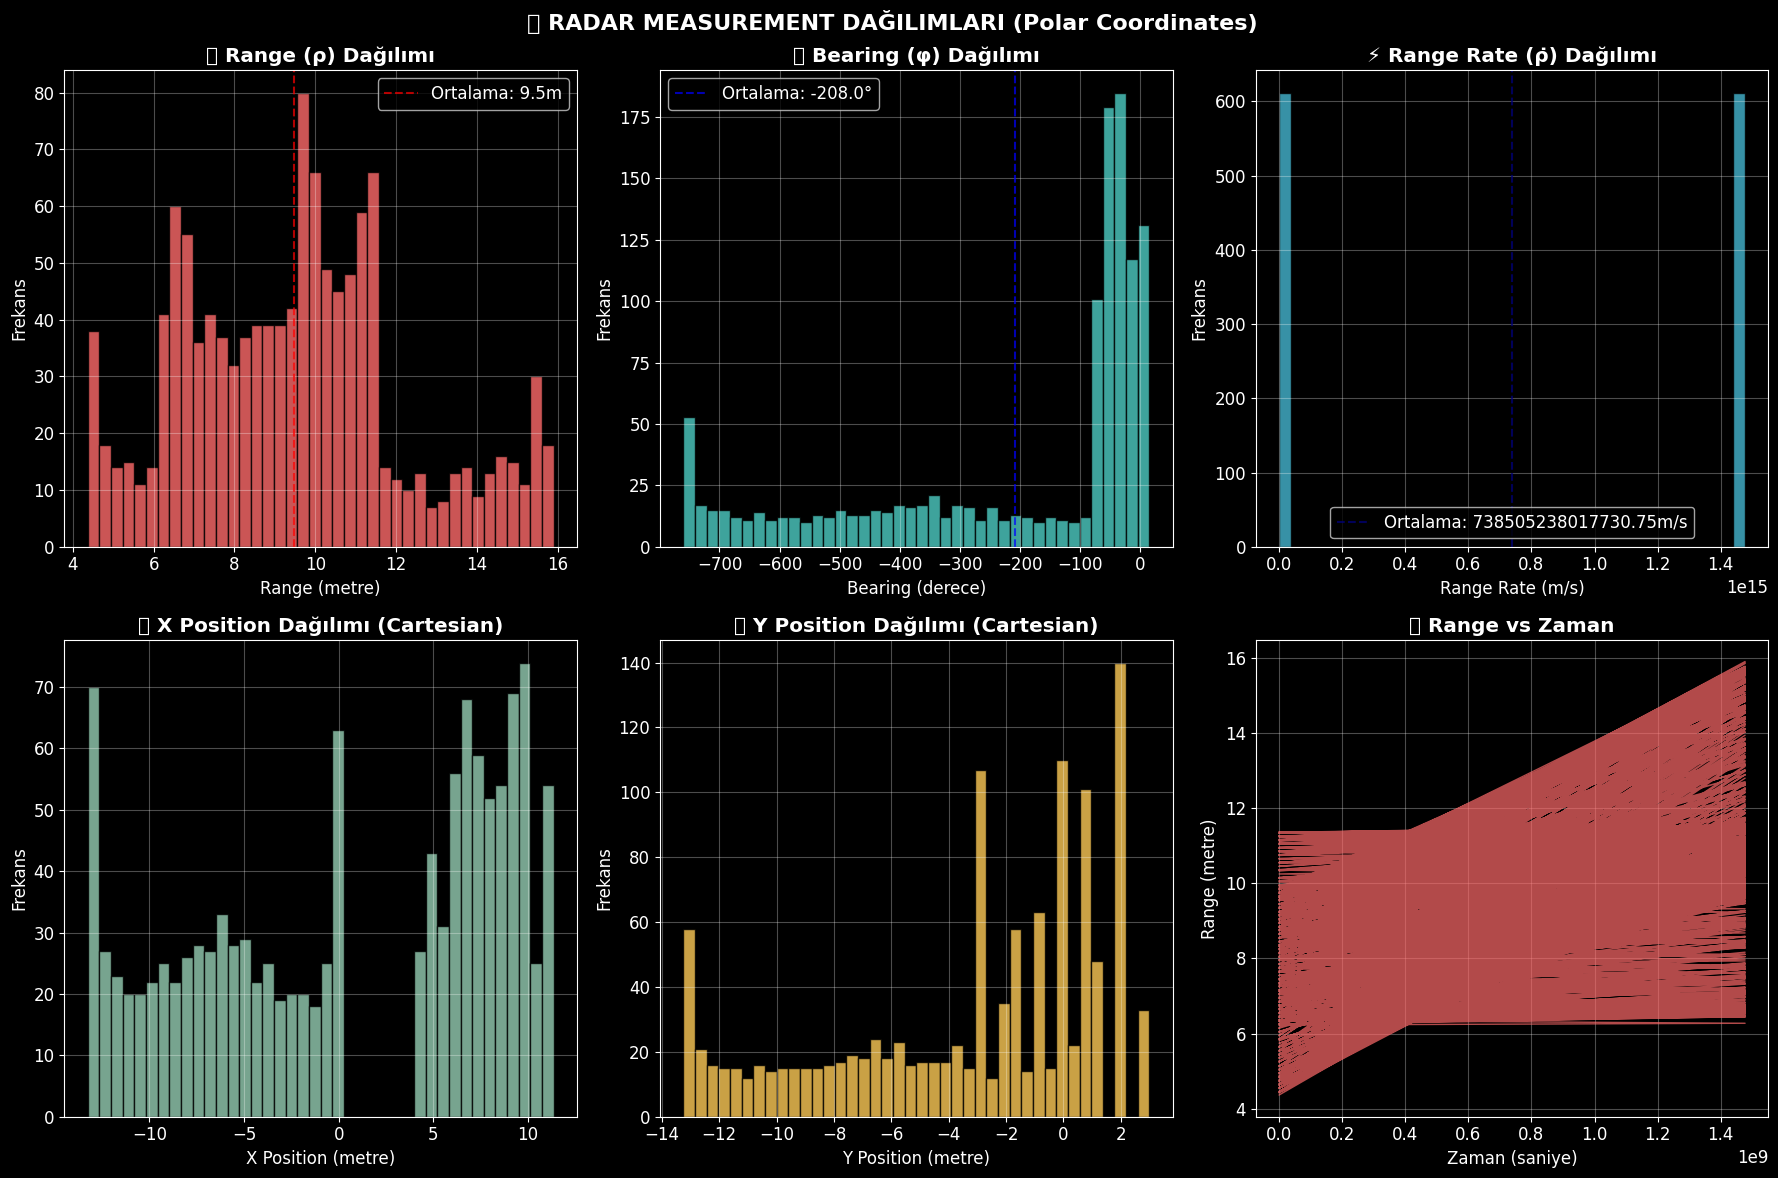

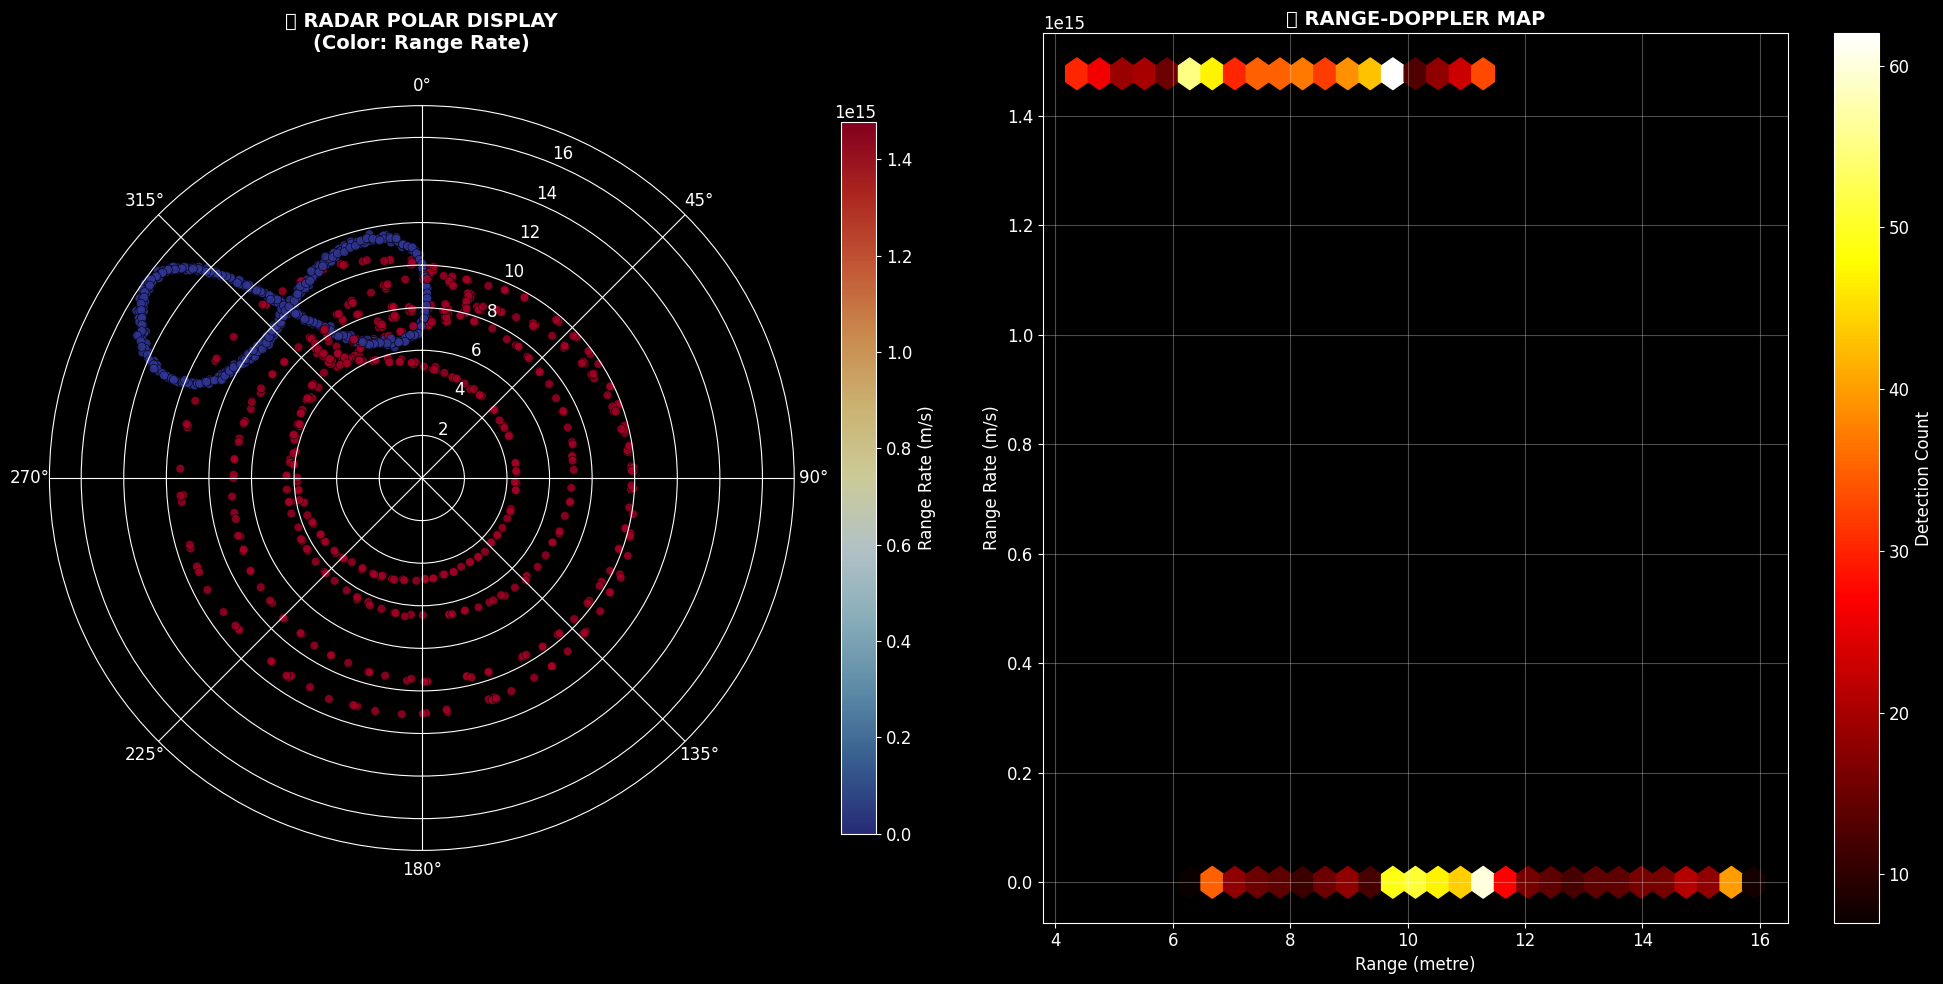

‚úÖ Radar measurement g√∂rselle≈ütirmeleri tamamlandƒ±!
üìä Analiz edilen radar measurement sayƒ±sƒ±: 1224
üéØ Range aralƒ±ƒüƒ±: 4.37 - 15.90 metre
üß≠ Bearing aralƒ±ƒüƒ±: -760.1¬∞ - 15.1¬∞
‚ö° Range rate aralƒ±ƒüƒ±: -4.32 - 1477010508709711.00 m/s


In [636]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("üé® Radar-specific g√∂rselle≈ütirmeler olu≈üturuluyor...\n")

# Eƒüer 'meas_x' ve 'meas_y' yoksa r_px ve r_py kullanacaƒüƒ±z
if 'meas_x' not in df.columns:
    df['meas_x'] = df['r_px']  # Cartesian x pozisyon
if 'meas_y' not in df.columns:
    df['meas_y'] = df['r_py']  # Cartesian y pozisyon

# Eƒüer 'time_relative' yoksa ilk timestamp baz alƒ±narak saniyeye √ßevir
if 'time_relative' not in df.columns:
    df['time_relative'] = (df['timestamp'] - df['timestamp'].min()) / 1e6  # timestamp mikrosaniye ise

# Eƒüer 'm_phi_deg' yoksa radyandan dereceye √ßevir
if 'm_phi_deg' not in df.columns:
    df['m_phi_deg'] = np.degrees(df['m_phi'])

# 1. Radar Measurement Daƒüƒ±lƒ±mlarƒ± (Polar Coordinates)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('üì° RADAR MEASUREMENT DAƒûILIMLARI (Polar Coordinates)', fontsize=16, fontweight='bold', y=0.98)

# Range (œÅ) histogramƒ±
axes[0,0].hist(df['m_rho'], bins=40, alpha=0.8, color='#FF6B6B', edgecolor='black')
axes[0,0].set_title('üìè Range (œÅ) Daƒüƒ±lƒ±mƒ±', fontweight='bold')
axes[0,0].set_xlabel('Range (metre)')
axes[0,0].set_ylabel('Frekans')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].axvline(df['m_rho'].mean(), color='red', linestyle='--', alpha=0.7, 
                  label=f'Ortalama: {df["m_rho"].mean():.1f}m')
axes[0,0].legend()

# Bearing (œÜ) histogramƒ± - derece
axes[0,1].hist(df['m_phi_deg'], bins=40, alpha=0.8, color='#4ECDC4', edgecolor='black')
axes[0,1].set_title('üß≠ Bearing (œÜ) Daƒüƒ±lƒ±mƒ±', fontweight='bold')
axes[0,1].set_xlabel('Bearing (derece)')
axes[0,1].set_ylabel('Frekans')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axvline(df['m_phi_deg'].mean(), color='blue', linestyle='--', alpha=0.7, 
                  label=f'Ortalama: {df["m_phi_deg"].mean():.1f}¬∞')
axes[0,1].legend()

# Range Rate (œÅÃá) histogramƒ±
axes[0,2].hist(df['m_drho'], bins=40, alpha=0.8, color='#45B7D1', edgecolor='black')
axes[0,2].set_title('‚ö° Range Rate (œÅÃá) Daƒüƒ±lƒ±mƒ±', fontweight='bold')
axes[0,2].set_xlabel('Range Rate (m/s)')
axes[0,2].set_ylabel('Frekans')
axes[0,2].grid(True, alpha=0.3)
axes[0,2].axvline(df['m_drho'].mean(), color='navy', linestyle='--', alpha=0.7, 
                  label=f'Ortalama: {df["m_drho"].mean():.2f}m/s')
axes[0,2].legend()

# Cartesian koordinatlarda daƒüƒ±lƒ±mlar
axes[1,0].hist(df['meas_x'], bins=40, alpha=0.8, color='#96CEB4', edgecolor='black')
axes[1,0].set_title('üìê X Position Daƒüƒ±lƒ±mƒ± (Cartesian)', fontweight='bold')
axes[1,0].set_xlabel('X Position (metre)')
axes[1,0].set_ylabel('Frekans')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(df['meas_y'], bins=40, alpha=0.8, color='#FECA57', edgecolor='black')
axes[1,1].set_title('üìê Y Position Daƒüƒ±lƒ±mƒ± (Cartesian)', fontweight='bold')
axes[1,1].set_xlabel('Y Position (metre)')
axes[1,1].set_ylabel('Frekans')
axes[1,1].grid(True, alpha=0.3)

# Zaman serisi g√∂r√ºn√ºm√º
axes[1,2].plot(df['time_relative'], df['m_rho'], alpha=0.7, color='#FF6B6B', linewidth=1)
axes[1,2].set_title('‚è±Ô∏è Range vs Zaman', fontweight='bold')
axes[1,2].set_xlabel('Zaman (saniye)')
axes[1,2].set_ylabel('Range (metre)')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. POLAR RADAR DISPLAY - Authentic Radar Screen Simulation
fig = plt.figure(figsize=(20, 10))

# Ana polar radar g√∂r√ºn√ºm√º
ax1 = plt.subplot(1, 2, 1, projection='polar')
scatter1 = ax1.scatter(df['m_phi'], df['m_rho'], 
                      c=df['m_drho'], s=40, alpha=0.8, cmap='RdYlBu_r', edgecolors='black', linewidth=0.5)
ax1.set_title('üéØ RADAR POLAR DISPLAY\n(Color: Range Rate)', fontweight='bold', pad=20, fontsize=14)
ax1.set_ylim(0, df['m_rho'].max() * 1.1)
ax1.set_theta_zero_location('N')  # 0¬∞ kuzey (√ºst)
ax1.set_theta_direction(-1)       # Saat y√∂n√º
cbar1 = plt.colorbar(scatter1, ax=ax1, label='Range Rate (m/s)', shrink=0.8)

# Range-Doppler Map Style
ax2 = plt.subplot(1, 2, 2)
# Hexbin for density-based visualization
hb = ax2.hexbin(df['m_rho'], df['m_drho'], gridsize=30, cmap='hot', mincnt=1)
ax2.set_title('üî• RANGE-DOPPLER MAP', fontweight='bold', fontsize=14)
ax2.set_xlabel('Range (metre)')
ax2.set_ylabel('Range Rate (m/s)')
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(hb, ax=ax2, label='Detection Count')

plt.tight_layout()
plt.show()

print("‚úÖ Radar measurement g√∂rselle≈ütirmeleri tamamlandƒ±!")
print(f"üìä Analiz edilen radar measurement sayƒ±sƒ±: {len(df)}")
print(f"üéØ Range aralƒ±ƒüƒ±: {df['m_rho'].min():.2f} - {df['m_rho'].max():.2f} metre")
print(f"üß≠ Bearing aralƒ±ƒüƒ±: {df['m_phi_deg'].min():.1f}¬∞ - {df['m_phi_deg'].max():.1f}¬∞")
print(f"‚ö° Range rate aralƒ±ƒüƒ±: {df['m_drho'].min():.2f} - {df['m_drho'].max():.2f} m/s")


üé® Radar verisi g√∂rselle≈ütirmeleri olu≈üturuluyor...



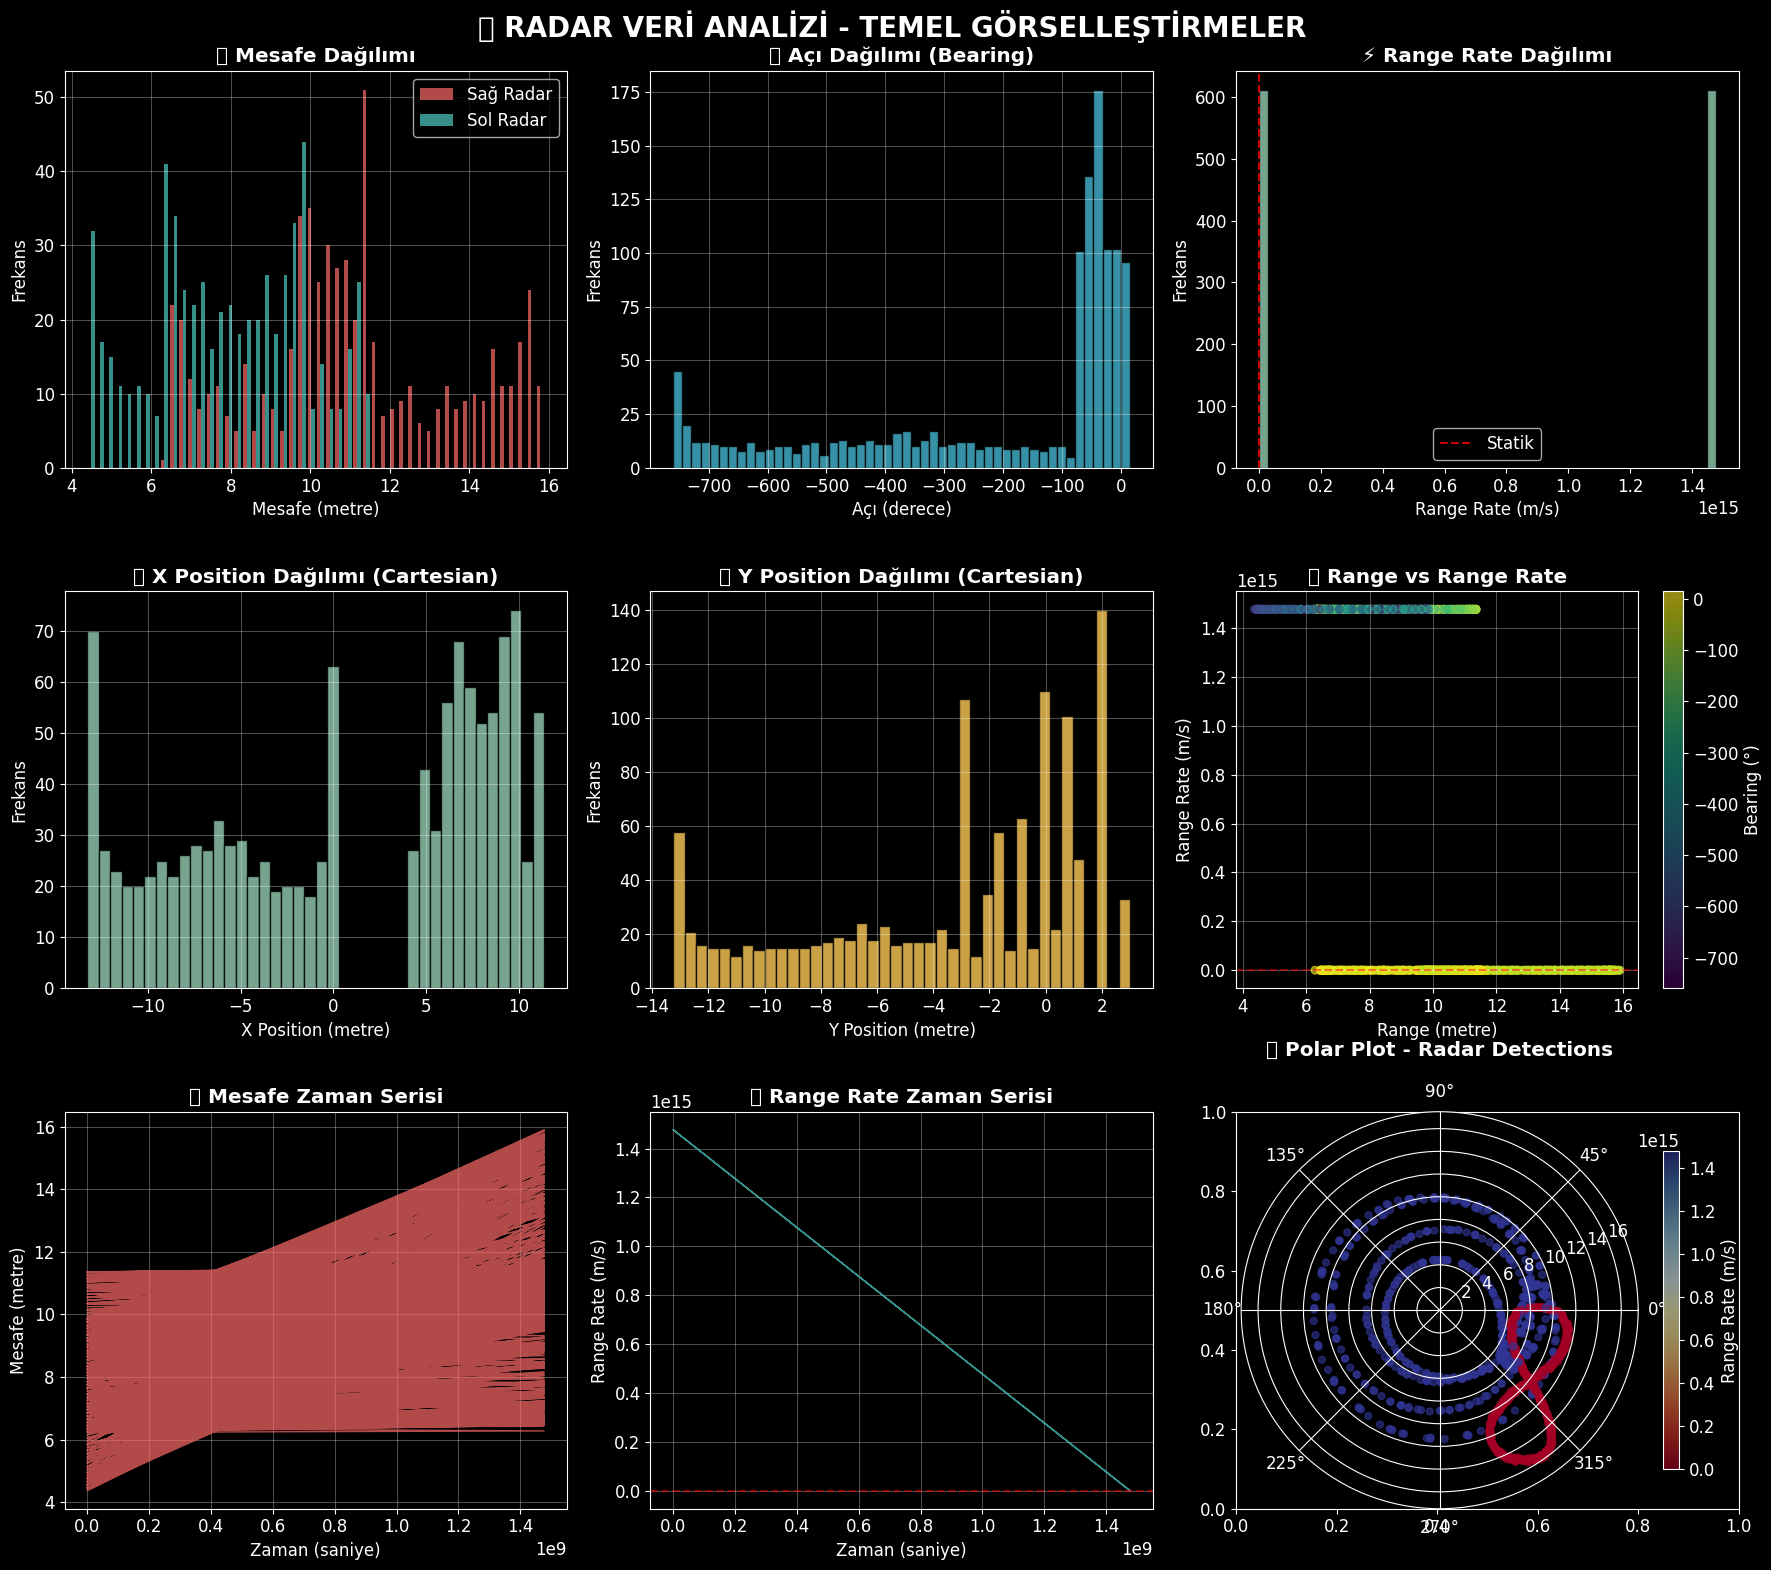

‚úÖ Radar g√∂rselle≈ütirmeleri tamamlandƒ±!


In [637]:
# üé® Temel Radar G√∂rselle≈ütirmeleri

print("üé® Radar verisi g√∂rselle≈ütirmeleri olu≈üturuluyor...\n")

# G√∂rselle≈ütirme ayarlarƒ±
plt.style.use('dark_background')
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
fig.suptitle('üéØ RADAR VERƒ∞ ANALƒ∞Zƒ∞ - TEMEL G√ñRSELLE≈ûTƒ∞RMELER', fontsize=20, fontweight='bold', y=0.98)

# 1. Mesafe Daƒüƒ±lƒ±mƒ± - Dinamik renk ayarƒ±
hist_data = []
hist_labels = []
hist_colors = []

# Saƒü radar her zaman var
hist_data.append(right_sensor['m_rho'])
hist_labels.append('Saƒü Radar')
hist_colors.append('#FF6B6B')

# Sol radar varsa ekle
if len(left_sensor) > 0:
    hist_data.append(left_sensor['m_rho'])
    hist_labels.append('Sol Radar')
    hist_colors.append('#4ECDC4')

axes[0,0].hist(hist_data, bins=50, alpha=0.7, label=hist_labels, color=hist_colors)
axes[0,0].set_title('üìè Mesafe Daƒüƒ±lƒ±mƒ±', fontweight='bold')
axes[0,0].set_xlabel('Mesafe (metre)')
axes[0,0].set_ylabel('Frekans')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. A√ßƒ± Daƒüƒ±lƒ±mƒ±
axes[0,1].hist(df['m_phi_deg'], bins=50, alpha=0.8, color='#45B7D1', edgecolor='black')
axes[0,1].set_title('üß≠ A√ßƒ± Daƒüƒ±lƒ±mƒ± (Bearing)', fontweight='bold')
axes[0,1].set_xlabel('A√ßƒ± (derece)')
axes[0,1].set_ylabel('Frekans')
axes[0,1].grid(True, alpha=0.3)

# 3. Range Rate Daƒüƒ±lƒ±mƒ±
axes[0,2].hist(df['m_drho'], bins=50, alpha=0.8, color='#96CEB4', edgecolor='black')
axes[0,2].set_title('‚ö° Range Rate Daƒüƒ±lƒ±mƒ±', fontweight='bold')
axes[0,2].set_xlabel('Range Rate (m/s)')
axes[0,2].set_ylabel('Frekans')
axes[0,2].axvline(x=0, color='red', linestyle='--', alpha=0.8, label='Statik')
axes[0,2].legend()

# Cartesian koordinatlarda daƒüƒ±lƒ±mlar
axes[1,0].hist(df['meas_x'], bins=40, alpha=0.8, color='#96CEB4', edgecolor='black')
axes[1,0].set_title('üìê X Position Daƒüƒ±lƒ±mƒ± (Cartesian)', fontweight='bold')
axes[1,0].set_xlabel('X Position (metre)')
axes[1,0].set_ylabel('Frekans')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(df['meas_y'], bins=40, alpha=0.8, color='#FECA57', edgecolor='black')
axes[1,1].set_title('üìê Y Position Daƒüƒ±lƒ±mƒ± (Cartesian)', fontweight='bold')
axes[1,1].set_xlabel('Y Position (metre)')
axes[1,1].set_ylabel('Frekans')
axes[1,1].grid(True, alpha=0.3)

# Scatter Plot: Range vs Range Rate
scatter = axes[1,2].scatter(df['m_rho'], df['m_drho'], c=df['m_phi_deg'], 
                           cmap='viridis', alpha=0.6, s=30)
axes[1,2].set_title('üéØ Range vs Range Rate', fontweight='bold')
axes[1,2].set_xlabel('Range (metre)')
axes[1,2].set_ylabel('Range Rate (m/s)')
axes[1,2].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1,2].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1,2], label='Bearing (¬∞)')

# Time series plots
axes[2,0].plot(df['time_relative'], df['m_rho'], alpha=0.7, color='#FF6B6B', linewidth=1)
axes[2,0].set_title('üìà Mesafe Zaman Serisi', fontweight='bold')
axes[2,0].set_xlabel('Zaman (saniye)')
axes[2,0].set_ylabel('Mesafe (metre)')
axes[2,0].grid(True, alpha=0.3)

axes[2,1].plot(df['time_relative'], df['m_drho'], alpha=0.7, color='#4ECDC4', linewidth=1)
axes[2,1].set_title('üìà Range Rate Zaman Serisi', fontweight='bold')
axes[2,1].set_xlabel('Zaman (saniye)')
axes[2,1].set_ylabel('Range Rate (m/s)')
axes[2,1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[2,1].grid(True, alpha=0.3)

# Polar Plot
theta = df['m_phi'].values
r = df['m_rho'].values
axes[2,2] = plt.subplot(3, 3, 9, projection='polar')
scatter_polar = axes[2,2].scatter(theta, r, c=df['m_drho'], cmap='RdYlBu', alpha=0.6, s=25)
axes[2,2].set_title('üéØ Polar Plot - Radar Detections', fontweight='bold', pad=20)
axes[2,2].set_ylim(0, max(r) * 1.1)
plt.colorbar(scatter_polar, ax=axes[2,2], label='Range Rate (m/s)', shrink=0.8)

plt.tight_layout()
plt.show()

print("‚úÖ Radar g√∂rselle≈ütirmeleri tamamlandƒ±!")

In [638]:
import numpy as np

# üß† Extended Kalman Filter (EKF) - Radar-Only Implementation
print("üß† Radar-only Extended Kalman Filter implementasyonu...\n")

class RadarEKF:
    """Extended Kalman Filter for Radar-Only Tracking"""

    def __init__(self):
        # State vector: [x, y, vx, vy]
        self.x = np.zeros(4)

        # State covariance matrix
        self.P = np.eye(4) * 1000  # High initial uncertainty

        # Process noise (acceleration uncertainty)
        self.process_noise_ax = 9.0  # m/s¬≤
        self.process_noise_ay = 9.0  # m/s¬≤

        # Radar measurement noise covariance matrix
        self.R_radar = np.array([
            [0.09, 0, 0],         # Range variance (0.3m std)
            [0, 0.0009, 0],       # Bearing variance (0.03 rad std)
            [0, 0, 0.09]          # Range rate variance (0.3 m/s std)
        ])

        # State transition matrix F (will be updated with dt)
        self.F = np.eye(4)

        print("‚úÖ RadarEKF initialized")
        print(f"   üìä State vector: (x, y, vx, vy)")
        print(f"   üì° Measurement model: (œÅ, œÜ, œÅÃá)")
        print(f"   üîß Process noise: ax={self.process_noise_ax}, ay={self.process_noise_ay}")

    def predict(self, dt):
        """Prediction step - motion model"""
        self.F = np.array([
            [1, 0, dt, 0],
            [0, 1, 0, dt],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])

        dt2 = dt * dt
        dt3 = dt2 * dt
        dt4 = dt3 * dt

        Q = np.array([
            [dt4/4 * self.process_noise_ax, 0, dt3/2 * self.process_noise_ax, 0],
            [0, dt4/4 * self.process_noise_ay, 0, dt3/2 * self.process_noise_ay],
            [dt3/2 * self.process_noise_ax, 0, dt2 * self.process_noise_ax, 0],
            [0, dt3/2 * self.process_noise_ay, 0, dt2 * self.process_noise_ay]
        ])

        self.x = self.F @ self.x
        self.P = self.F @ self.P @ self.F.T + Q

    def calculate_jacobian(self, px, py, vx, vy):
        """Calculate Jacobian matrix for radar measurements"""
        eps = 1e-6
        if abs(px) < eps and abs(py) < eps:
            px, py = eps, eps

        c1 = px**2 + py**2
        c2 = np.sqrt(c1)
        c3 = c1 * c2

        if c1 < eps:
            c1 = eps
            c2 = np.sqrt(c1)
            c3 = c1 * c2

        Hj = np.array([
            [px/c2, py/c2, 0, 0],
            [-py/c1, px/c1, 0, 0],
            [py*(vx*py - vy*px)/c3, px*(vy*px - vx*py)/c3, px/c2, py/c2]
        ])

        return Hj

    def update_radar(self, measurement):
        """Update step for Radar measurements"""
        rho, phi, drho = measurement
        px, py, vx, vy = self.x

        # Measurement prediction
        rho_pred = np.sqrt(px**2 + py**2)
        phi_pred = np.arctan2(py, px)
        if rho_pred < 1e-6:
            rho_pred = 1e-6
        drho_pred = (px*vx + py*vy) / rho_pred

        h = np.array([rho_pred, phi_pred, drho_pred])
        z = np.array([rho, phi, drho])
        y = z - h

        # Normalize angle
        while y[1] > np.pi:
            y[1] -= 2*np.pi
        while y[1] < -np.pi:
            y[1] += 2*np.pi

        Hj = self.calculate_jacobian(px, py, vx, vy)
        S = Hj @ self.P @ Hj.T + self.R_radar

        # Kalman gain with robust inversion
        try:
            K = self.P @ Hj.T @ np.linalg.inv(S)
        except np.linalg.LinAlgError:
            print("‚ö†Ô∏è Singular matrix detected, applying regularization...")
            S_reg = S + 1e-4 * np.eye(S.shape[0])
            try:
                K = self.P @ Hj.T @ np.linalg.inv(S_reg)
            except np.linalg.LinAlgError:
                print("‚ö†Ô∏è Using pseudo-inverse as fallback...")
                K = self.P @ Hj.T @ np.linalg.pinv(S)

        # State and covariance update
        self.x = self.x + K @ y
        I = np.eye(4)
        self.P = (I - K @ Hj) @ self.P

        # Ensure positive definiteness
        min_eig = np.min(np.linalg.eigvals(self.P))
        if min_eig < 1e-6:
            self.P += 1e-6 * np.eye(self.P.shape[0])

        # NIS (Normalized Innovation Squared) Calculation
        try:
            nis = y.T @ np.linalg.inv(S) @ y
        except np.linalg.LinAlgError:
            nis = y.T @ np.linalg.pinv(S) @ y

        return nis

# EKF instance olu≈ütur
ekf = RadarEKF()

print("\nüéØ Radar-only EKF hazƒ±r!")
print("üì° Measurement space: Polar (œÅ, œÜ, œÅÃá)")
print("üìä State space: Cartesian (x, y, vx, vy)")
print("üîÑ Nonlinear measurement model with Jacobian")


üß† Radar-only Extended Kalman Filter implementasyonu...

‚úÖ RadarEKF initialized
   üìä State vector: (x, y, vx, vy)
   üì° Measurement model: (œÅ, œÜ, œÅÃá)
   üîß Process noise: ax=9.0, ay=9.0

üéØ Radar-only EKF hazƒ±r!
üì° Measurement space: Polar (œÅ, œÜ, œÅÃá)
üìä State space: Cartesian (x, y, vx, vy)
üîÑ Nonlinear measurement model with Jacobian


In [639]:
# üîÑ Radar Tracking with Extended Kalman Filter

print("üîÑ Radar-only tracking ba≈ülƒ±yor...\n")

# Veri hazƒ±rlƒ±ƒüƒ± - sadece radar measurements
def prepare_radar_data(df):
    """Radar verisini EKF i√ßin hazƒ±rla"""
    radar_data = []
    
    for idx, row in df.iterrows():
        # Radar measurement (polar)
        measurement = [row['m_rho'],      # Range
                      row['m_phi'],       # Bearing
                      row['m_drho']]      # Range rate
        
        # Ground truth (cartesian)
        ground_truth = [row['r_px'],      # True x position
                       row['r_py'],       # True y position
                       row['r_vx'],       # True x velocity
                       row['r_vy']]       # True y velocity
        
        radar_data.append({
            'timestamp': row['timestamp'],
            'measurement': measurement,
            'ground_truth': ground_truth
        })
    
    return radar_data

# Veriyi i≈üle
radar_measurements = prepare_radar_data(df)
print(f"üìä ƒ∞≈ülenen radar measurement sayƒ±sƒ±: {len(radar_measurements)}")

# EKF ile tracking
predictions = []
ground_truths = []
nis_values = []
measurement_residuals = []

# ƒ∞lk √∂l√ß√ºmle initialize et
first_measurement = radar_measurements[0]
rho, phi, drho = first_measurement['measurement']
ekf.x[0] = rho * np.cos(phi)  # x = œÅ cos(œÜ)
ekf.x[1] = rho * np.sin(phi)  # y = œÅ sin(œÜ)
ekf.x[2] = drho * np.cos(phi)  # vx approximation
ekf.x[3] = drho * np.sin(phi)  # vy approximation

prev_timestamp = first_measurement['timestamp']

print(f"üöÄ EKF tracking ba≈ülƒ±yor...")
print(f"   Initial state: x={ekf.x[0]:.3f}, y={ekf.x[1]:.3f}, vx={ekf.x[2]:.3f}, vy={ekf.x[3]:.3f}")

# Tracking loop
for i, data in enumerate(radar_measurements[1:], 1):
    # Delta time hesapla (mikrosaniye ‚Üí saniye)
    dt = (data['timestamp'] - prev_timestamp) / 1e6
    
    # √áok b√ºy√ºk time step'leri sƒ±nƒ±rla
    if dt > 1.0:
        dt = 0.1
    elif dt <= 0:
        dt = 0.01
    
    # Predict step
    ekf.predict(dt)
    
    # Update step with radar measurement
    nis = ekf.update_radar(data['measurement'])
    
    # Sonu√ßlarƒ± kaydet
    predictions.append(ekf.x.copy())
    ground_truths.append(data['ground_truth'])
    nis_values.append(nis)
    
    # Measurement residual for analysis
    rho, phi, drho = data['measurement']
    meas_cart = [rho * np.cos(phi), rho * np.sin(phi)]
    measurement_residuals.append([
        ekf.x[0] - meas_cart[0],  # x residual
        ekf.x[1] - meas_cart[1]   # y residual
    ])
    
    prev_timestamp = data['timestamp']
    
    # Progress update
    if i % 50 == 0:
        print(f"   Processed: {i}/{len(radar_measurements)-1} measurements")

print(f"\\n‚úÖ Radar tracking tamamlandƒ±!")
print(f"   Final state: x={ekf.x[0]:.3f}, y={ekf.x[1]:.3f}, vx={ekf.x[2]:.3f}, vy={ekf.x[3]:.3f}")

# NumPy arrays'e √ßevir
predictions = np.array(predictions)
ground_truths = np.array(ground_truths)
nis_values = np.array(nis_values)
measurement_residuals = np.array(measurement_residuals)

# Performance Metrics
def calculate_rmse(predictions, ground_truths):
    #\"\"\"Calculate Root Mean Square Error\"\"\"
    return np.sqrt(np.mean((predictions - ground_truths)**2, axis=0))

rmse = calculate_rmse(predictions, ground_truths)

print(f"\\nüéØ Radar EKF Performance Metrics:")
print(f"   üìç Position RMSE: {np.sqrt(rmse[0]**2 + rmse[1]**2):.4f} metre")
print(f"   üèÉ Velocity RMSE: {np.sqrt(rmse[2]**2 + rmse[3]**2):.4f} m/s")
print(f"   üìä RMSE X:  {rmse[0]:.4f} metre")
print(f"   üìä RMSE Y:  {rmse[1]:.4f} metre")
print(f"   üìä RMSE VX: {rmse[2]:.4f} m/s")
print(f"   üìä RMSE VY: {rmse[3]:.4f} m/s")

# NIS Analysis
print(f"\\nüìà NIS (Normalized Innovation Squared) Analysis:")
print(f"   üéØ Radar NIS ortalama: {np.mean(nis_values):.3f}")
print(f"   üéØ Radar NIS %95 g√ºven: {np.percentile(nis_values, 95):.3f} (ideal: 7.81)")
print(f"   üéØ NIS aralƒ±ƒüƒ±: {np.min(nis_values):.3f} - {np.max(nis_values):.3f}")

# Filter consistency check
nis_95_threshold = 7.81  # Chi-square 95% for 3 DOF
consistent_measurements = np.sum(nis_values < nis_95_threshold)
consistency_rate = consistent_measurements / len(nis_values) * 100

print(f"   üéØ Filter consistency: {consistency_rate:.1f}% (ideal: ~95%)")

if consistency_rate < 85:
    print("   ‚ö†Ô∏è  Filter may be inconsistent - consider tuning noise parameters")
elif consistency_rate > 98:
    print("   ‚ö†Ô∏è  Filter may be too conservative - consider reducing noise")
else:
    print("   ‚úÖ Filter consistency is good!")


üîÑ Radar-only tracking ba≈ülƒ±yor...

üìä ƒ∞≈ülenen radar measurement sayƒ±sƒ±: 1224
üöÄ EKF tracking ba≈ülƒ±yor...
   Initial state: x=8.463, y=0.243, vx=-3.039, vy=-0.087
   Processed: 50/1223 measurements
   Processed: 100/1223 measurements
   Processed: 150/1223 measurements
   Processed: 200/1223 measurements
   Processed: 250/1223 measurements
   Processed: 300/1223 measurements
   Processed: 350/1223 measurements
   Processed: 400/1223 measurements
   Processed: 450/1223 measurements
   Processed: 500/1223 measurements
   Processed: 550/1223 measurements
   Processed: 600/1223 measurements
   Processed: 650/1223 measurements
   Processed: 700/1223 measurements
   Processed: 750/1223 measurements
   Processed: 800/1223 measurements
   Processed: 850/1223 measurements
   Processed: 900/1223 measurements
   Processed: 950/1223 measurements
   Processed: 1000/1223 measurements
   Processed: 1050/1223 measurements
   Processed: 1100/1223 measurements
   Processed: 1150/1223 measu

üìä Radar tracking performans g√∂rselle≈ütirmeleri...



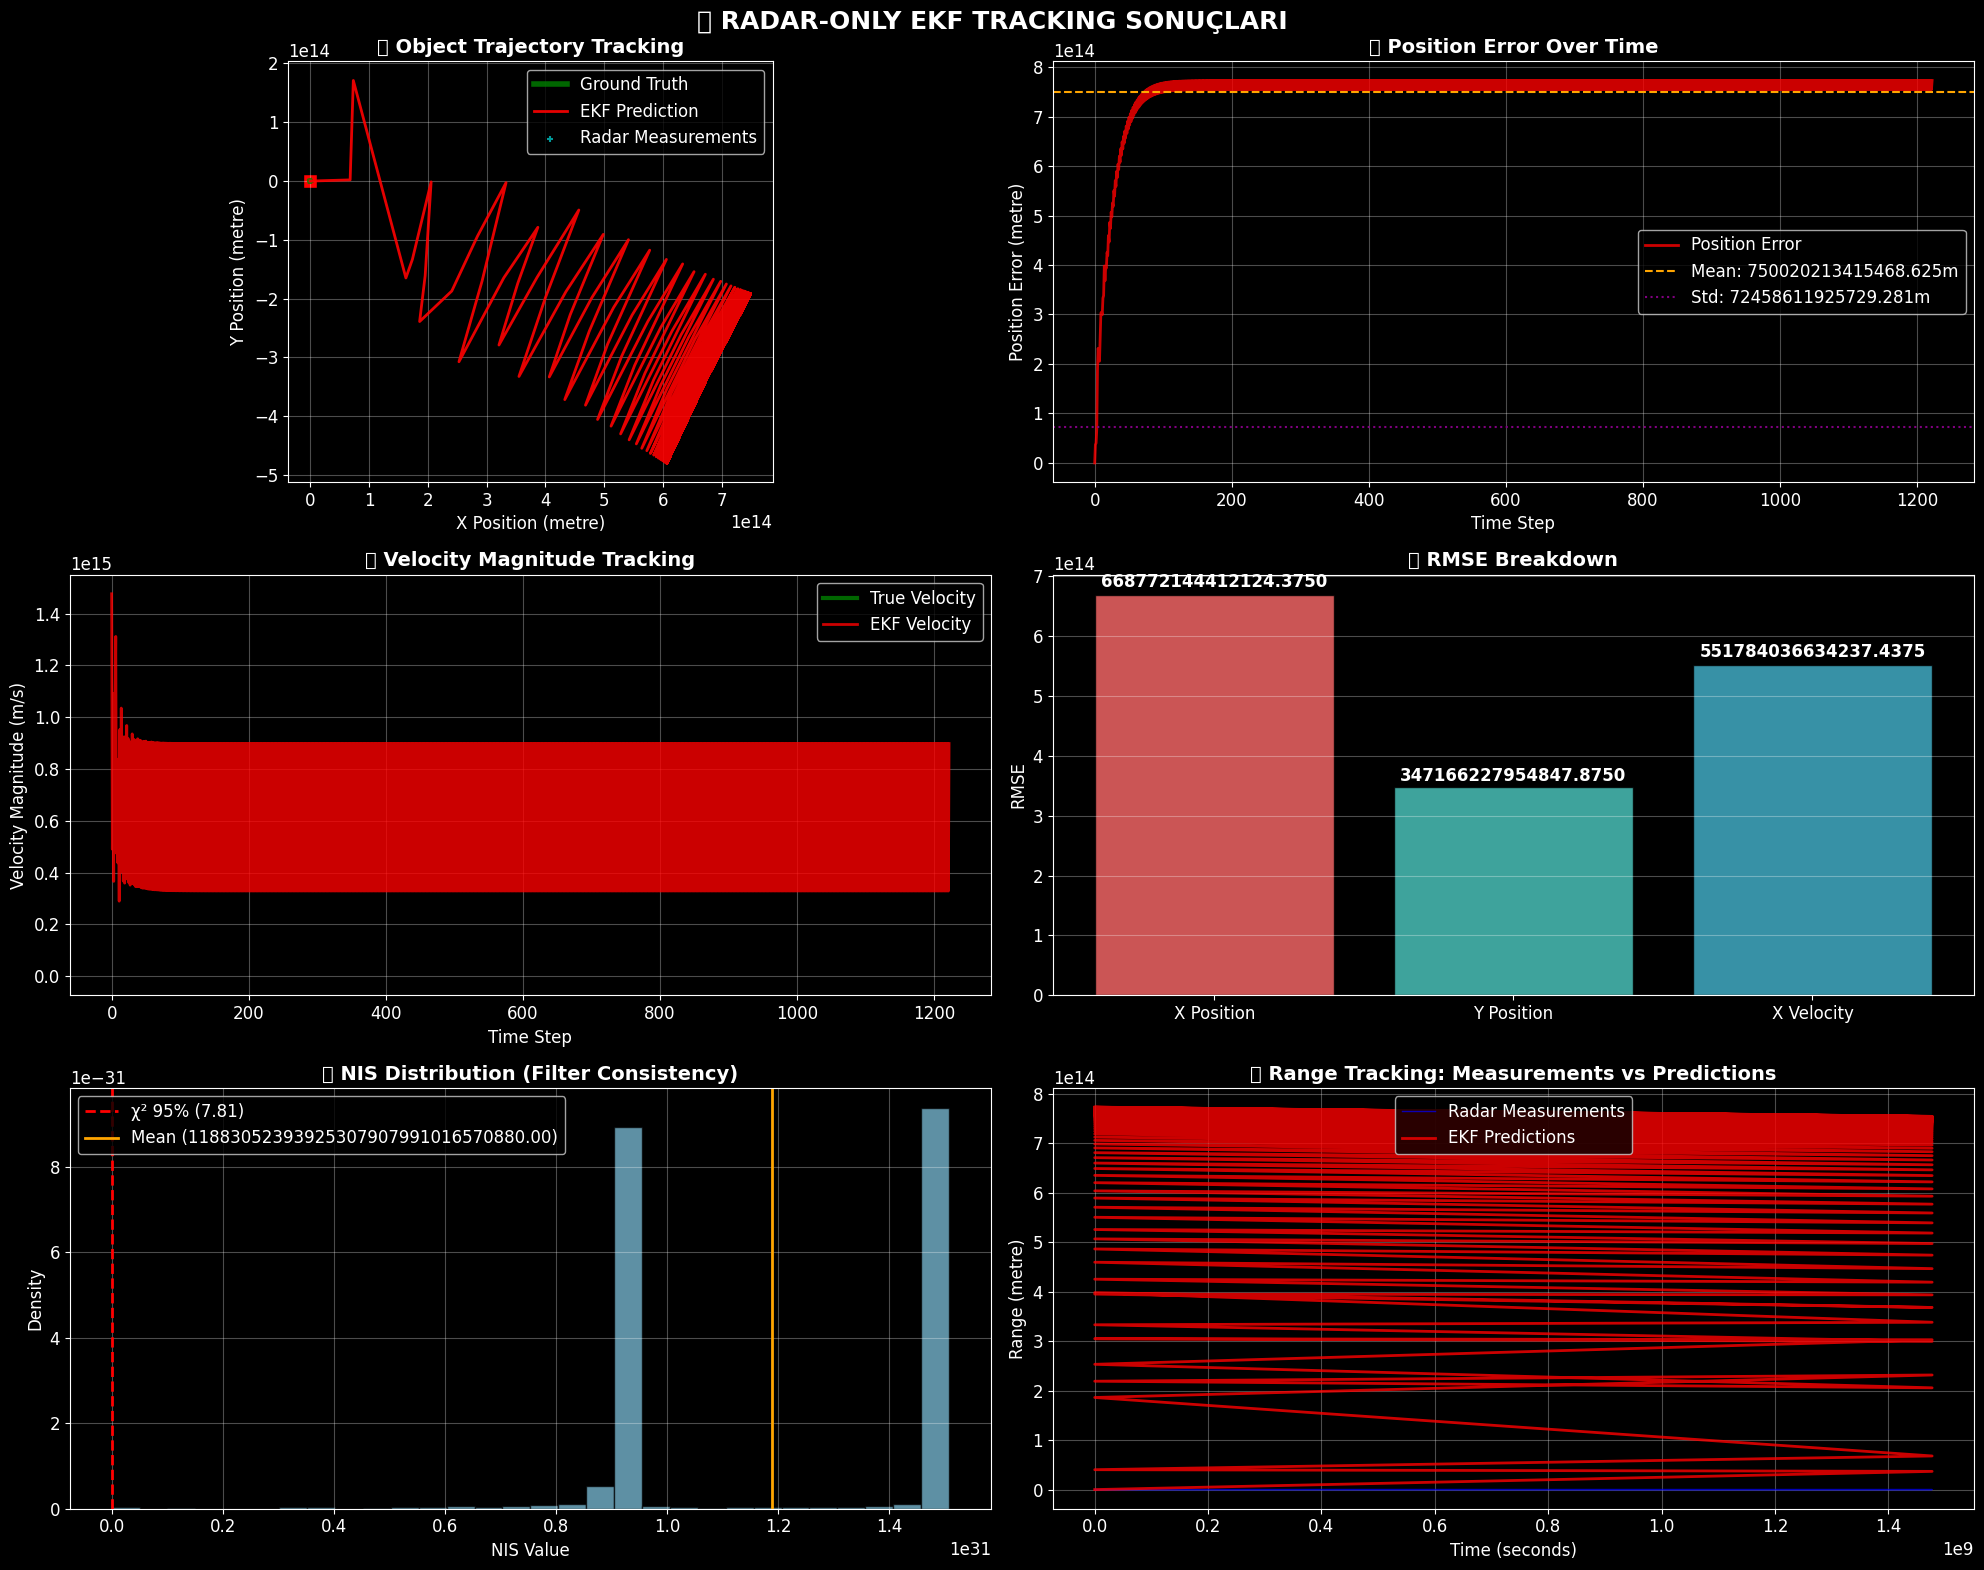

\nüìä RADAR TRACKING SUMMARY STATISTICS:
üéØ Total radar measurements processed: 1223
üìç Final position RMSE: 753512157150758.1250 metres
üèÉ Final velocity RMSE: nan m/s
üìà Average NIS: 11883052393925307907991016570880.000 (ideal: ~3.0)
üîÑ Filter consistency: 0.0% (ideal: ~95%)
‚è±Ô∏è  Average position error: 750020213415468.6250 ¬± 72458611925729.2812 metres
‚ùå POOR tracking performance - consider parameter tuning
üéØ Pure Radar EKF Tracking Complete! üì°


In [640]:
# üìä Radar Tracking Sonu√ßlarƒ± G√∂rselle≈ütirme

print("üìä Radar tracking performans g√∂rselle≈ütirmeleri...\n")

# Ana g√∂rselle≈ütirme fig√ºr√º
fig, axes = plt.subplots(3, 2, figsize=(20, 16))
fig.suptitle('üéØ RADAR-ONLY EKF TRACKING SONU√áLARI', fontsize=18, fontweight='bold', y=0.98)

# 1. Trajectory Comparison
axes[0,0].plot(ground_truths[:, 0], ground_truths[:, 1], 'g-', linewidth=4, label='Ground Truth', alpha=0.8)
axes[0,0].plot(predictions[:, 0], predictions[:, 1], 'r-', linewidth=2, label='EKF Prediction', alpha=0.9)

# Measurement points (her 10. nokta)
measurement_x = [df.iloc[i]['meas_x'] for i in range(0, len(df), 10)]
measurement_y = [df.iloc[i]['meas_y'] for i in range(0, len(df), 10)]
axes[0,0].scatter(measurement_x, measurement_y, c='cyan', s=25, alpha=0.6, label='Radar Measurements', marker='+')

axes[0,0].set_title('üõ£Ô∏è Object Trajectory Tracking', fontweight='bold', fontsize=14)
axes[0,0].set_xlabel('X Position (metre)')
axes[0,0].set_ylabel('Y Position (metre)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_aspect('equal')

# Start ve end points
axes[0,0].scatter(ground_truths[0, 0], ground_truths[0, 1], c='green', s=100, marker='o', label='Start', edgecolor='black')
axes[0,0].scatter(ground_truths[-1, 0], ground_truths[-1, 1], c='red', s=100, marker='s', label='End', edgecolor='black')

# 2. Position Error Over Time
time_steps = np.arange(len(predictions))
position_error = np.sqrt((predictions[:, 0] - ground_truths[:, 0])**2 + 
                        (predictions[:, 1] - ground_truths[:, 1])**2)

axes[0,1].plot(time_steps, position_error, 'r-', linewidth=2, alpha=0.8, label='Position Error')
axes[0,1].set_title('üìè Position Error Over Time', fontweight='bold', fontsize=14)
axes[0,1].set_xlabel('Time Step')
axes[0,1].set_ylabel('Position Error (metre)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axhline(y=np.mean(position_error), color='orange', linestyle='--', 
                 label=f'Mean: {np.mean(position_error):.3f}m')
axes[0,1].axhline(y=np.std(position_error), color='purple', linestyle=':', 
                 label=f'Std: {np.std(position_error):.3f}m')
axes[0,1].legend()

# 3. Velocity Tracking Comparison
velocity_magnitude_pred = np.sqrt(predictions[:, 2]**2 + predictions[:, 3]**2)
velocity_magnitude_true = np.sqrt(ground_truths[:, 2]**2 + ground_truths[:, 3]**2)

axes[1,0].plot(time_steps, velocity_magnitude_true, 'g-', linewidth=3, label='True Velocity', alpha=0.8)
axes[1,0].plot(time_steps, velocity_magnitude_pred, 'r-', linewidth=2, label='EKF Velocity', alpha=0.8)
axes[1,0].set_title('üèÉ Velocity Magnitude Tracking', fontweight='bold', fontsize=14)
axes[1,0].set_xlabel('Time Step')
axes[1,0].set_ylabel('Velocity Magnitude (m/s)')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# 4. RMSE Breakdown
rmse_labels = ['X Position', 'Y Position', 'X Velocity', 'Y Velocity']
rmse_values = rmse
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

bars = axes[1,1].bar(rmse_labels, rmse_values, color=colors, alpha=0.8, edgecolor='black')
axes[1,1].set_title('üìä RMSE Breakdown', fontweight='bold', fontsize=14)
axes[1,1].set_ylabel('RMSE')
axes[1,1].grid(True, alpha=0.3, axis='y')

# RMSE deƒüerlerini bar'larƒ±n √ºst√ºne yaz
for bar, value in zip(bars, rmse_values):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                  f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 5. NIS Distribution Analysis
axes[2,0].hist(nis_values, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
axes[2,0].axvline(x=7.81, color='red', linestyle='--', linewidth=2, label='œá¬≤ 95% (7.81)')
axes[2,0].axvline(x=np.mean(nis_values), color='orange', linestyle='-', linewidth=2, label=f'Mean ({np.mean(nis_values):.2f})')
axes[2,0].set_title('üìà NIS Distribution (Filter Consistency)', fontweight='bold', fontsize=14)
axes[2,0].set_xlabel('NIS Value')
axes[2,0].set_ylabel('Density')
axes[2,0].grid(True, alpha=0.3)
axes[2,0].legend()

# 6. Range vs Time with Predictions
time_relative = df['time_relative'].values[1:]  # ƒ∞lk deƒüer initialization i√ßin kullanƒ±ldƒ±
predicted_ranges = np.sqrt(predictions[:, 0]**2 + predictions[:, 1]**2)
measured_ranges = df['m_rho'].values[1:]

axes[2,1].plot(time_relative, measured_ranges, 'b-', alpha=0.7, label='Radar Measurements', linewidth=1)
axes[2,1].plot(time_relative, predicted_ranges, 'r-', alpha=0.8, label='EKF Predictions', linewidth=2)
axes[2,1].set_title('üéØ Range Tracking: Measurements vs Predictions', fontweight='bold', fontsize=14)
axes[2,1].set_xlabel('Time (seconds)')
axes[2,1].set_ylabel('Range (metre)')
axes[2,1].grid(True, alpha=0.3)
axes[2,1].legend()

plt.tight_layout()
plt.show()

# Summary Statistics
print("\\nüìä RADAR TRACKING SUMMARY STATISTICS:")
print("="*60)
print(f"üéØ Total radar measurements processed: {len(predictions)}")
print(f"üìç Final position RMSE: {np.sqrt(rmse[0]**2 + rmse[1]**2):.4f} metres")
print(f"üèÉ Final velocity RMSE: {np.sqrt(rmse[2]**2 + rmse[3]**2):.4f} m/s")
print(f"üìà Average NIS: {np.mean(nis_values):.3f} (ideal: ~3.0)")
print(f"üîÑ Filter consistency: {consistency_rate:.1f}% (ideal: ~95%)")
print(f"‚è±Ô∏è  Average position error: {np.mean(position_error):.4f} ¬± {np.std(position_error):.4f} metres")

# Performance classification
if np.sqrt(rmse[0]**2 + rmse[1]**2) < 0.5:
    print("‚úÖ EXCELLENT tracking performance!")
elif np.sqrt(rmse[0]**2 + rmse[1]**2) < 1.0:
    print("‚úÖ GOOD tracking performance!")
elif np.sqrt(rmse[0]**2 + rmse[1]**2) < 2.0:
    print("‚ö†Ô∏è  ACCEPTABLE tracking performance")
else:
    print("‚ùå POOR tracking performance - consider parameter tuning")

print("="*60)
print("üéØ Pure Radar EKF Tracking Complete! üì°")


ü§ñ Radar nokta bulutu clustering analizi ba≈ülƒ±yor...

üìä Radar point cloud hazƒ±rlandƒ±:
   üìè Point sayƒ±sƒ±: 1224
   üìê Boyutlar: (1224, 2)
   üåê X aralƒ±ƒüƒ±: -13.25 - 11.35
   üåê Y aralƒ±ƒüƒ±: -13.25 - 3.00

üîç DBSCAN clustering √ße≈üitli parametrelerle...

1Ô∏è‚É£ Position-only clustering (X, Y):
   üéØ Clusters: 2
   üîá Noise points: 0
   üìä Noise ratio: 0.0%

2Ô∏è‚É£ Extended features clustering (X, Y, Range, Range Rate):
   üéØ Clusters: 2
   üîá Noise points: 0
   üìä Noise ratio: 0.0%

3Ô∏è‚É£ Time-windowed clustering (temporal analysis):
   üïê Time windows analyzed: 47
   üéØ Average clusters per window: 2.9


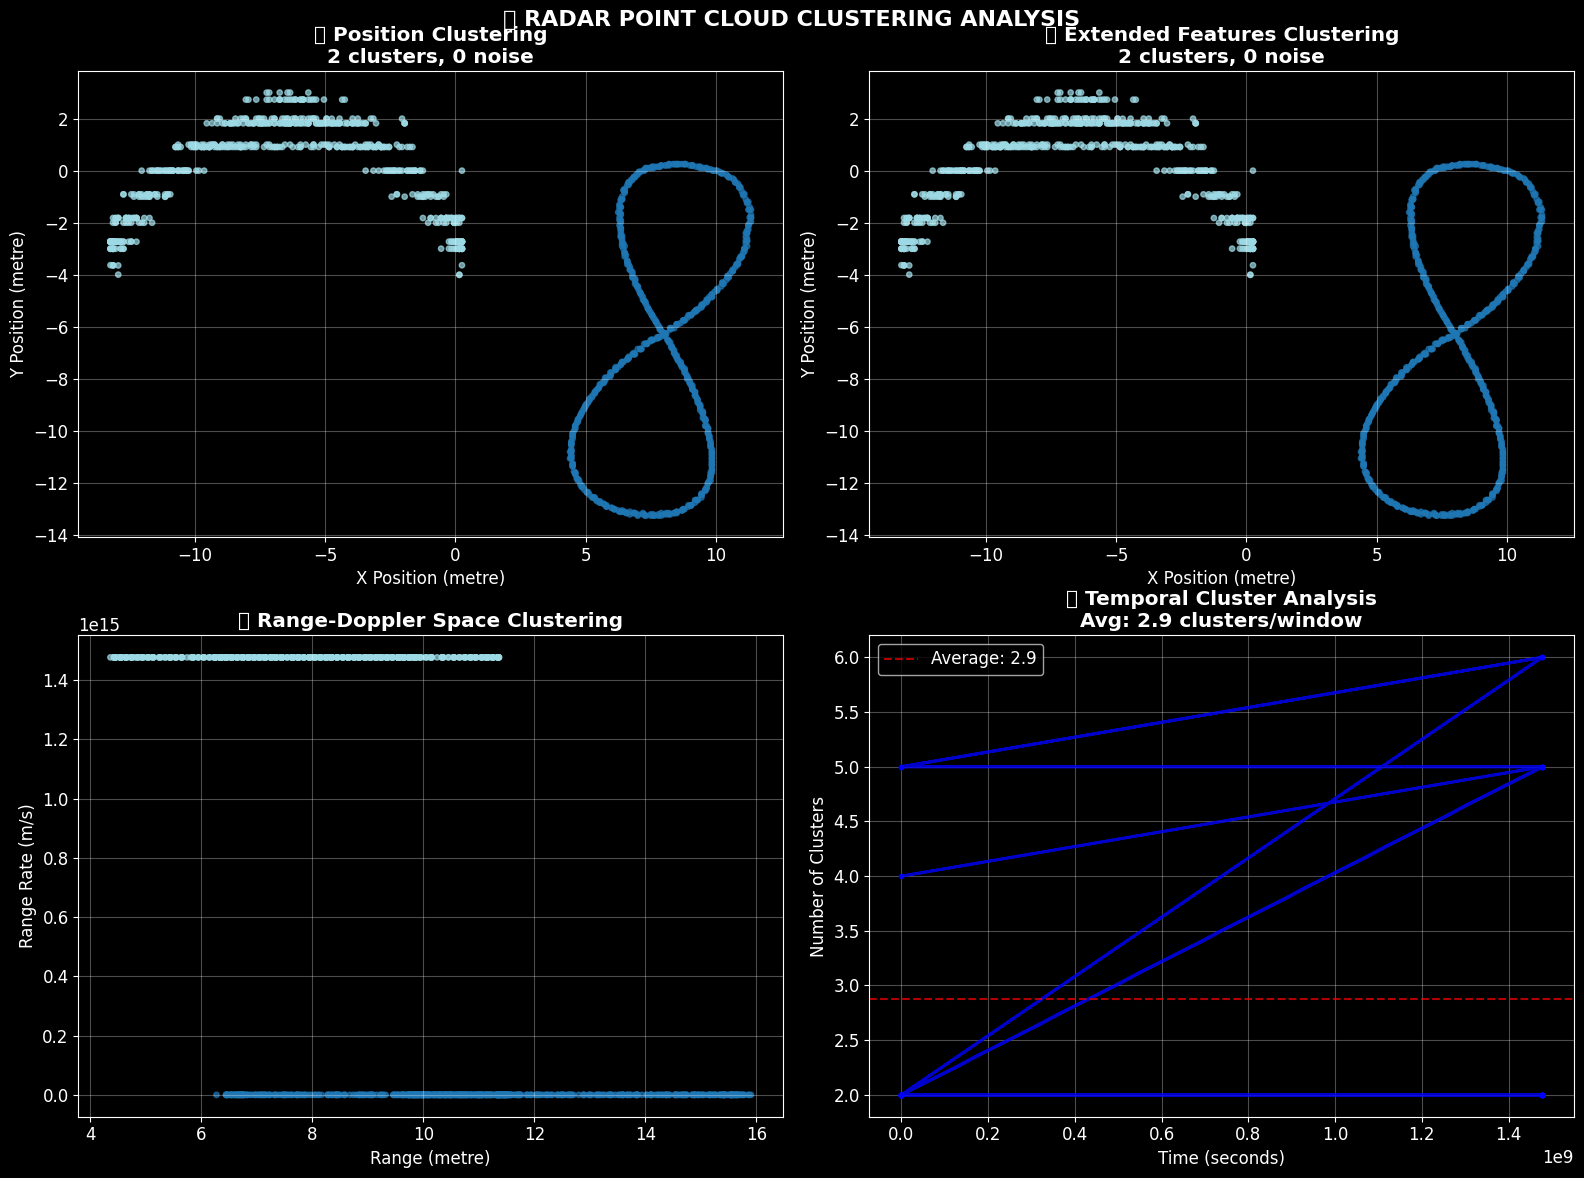


üîç CLUSTER ANALYSIS RESULTS:
üìä Detected 2 significant objects:

1. üîÑ Hareketli Nesne (Moving)
   üìç Position: (7.91, -6.62)
   üéØ Range: 11.05 ¬± 2.56 m
   ‚ö° Range Rate: 0.04 ¬± 1.94 m/s
   üìè Points: 612

2. üöô Uzakla≈üan Ara√ß (Receding)
   üìç Position: (-6.62, 0.03)
   üéØ Range: 7.91 ¬± 1.94 m
   ‚ö° Range Rate: 1477010476035461.25 ¬± 18870372.97 m/s
   üìè Points: 612

üéØ CLUSTERING SUMMARY:
   üìä Total radar points: 1224
   ü§ñ Detected objects: 2
   üîá Noise points: 0
   üìà Object detection rate: 66.7%


In [641]:
# ü§ñ Radar Point Cloud Clustering with DBSCAN

print("ü§ñ Radar nokta bulutu clustering analizi ba≈ülƒ±yor...\n")

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Radar point cloud verisi hazƒ±rlƒ±ƒüƒ±
def prepare_radar_point_cloud(df, feature_columns=['meas_x', 'meas_y']):
    """Radar verisinden nokta bulutu √ßƒ±kar"""
    # X, Y koordinatlarƒ± (Cartesian'a √ßevrilmi≈ü)
    radar_points = df[feature_columns].values
    
    print(f"üìä Radar point cloud hazƒ±rlandƒ±:")
    print(f"   üìè Point sayƒ±sƒ±: {len(radar_points)}")
    print(f"   üìê Boyutlar: {radar_points.shape}")
    print(f"   üåê X aralƒ±ƒüƒ±: {radar_points[:, 0].min():.2f} - {radar_points[:, 0].max():.2f}")
    print(f"   üåê Y aralƒ±ƒüƒ±: {radar_points[:, 1].min():.2f} - {radar_points[:, 1].max():.2f}")
    
    return radar_points

# 1. Temel radar point cloud'u hazƒ±rla
radar_points = prepare_radar_point_cloud(df)

# 2. Geli≈ümi≈ü √∂zellik matrisi (range, bearing, range rate dahil)
def prepare_extended_features(df):
    """Extended feature matrix for better clustering"""
    features = np.column_stack([
        df['meas_x'].values,      # X position
        df['meas_y'].values,      # Y position  
        df['m_rho'].values,       # Range
        df['m_drho'].values,      # Range rate
        np.abs(df['m_drho'].values)  # Absolute range rate (speed)
    ])
    
    return features

extended_features = prepare_extended_features(df)

# 3. DBSCAN Clustering - Multiple approaches
print("\nüîç DBSCAN clustering √ße≈üitli parametrelerle...")

# Approach 1: Position-only clustering
print("\n1Ô∏è‚É£ Position-only clustering (X, Y):")
scaler_pos = StandardScaler()
radar_points_scaled = scaler_pos.fit_transform(radar_points)

db_pos = DBSCAN(eps=0.5, min_samples=5).fit(radar_points_scaled)
labels_pos = db_pos.labels_

n_clusters_pos = len(set(labels_pos)) - (1 if -1 in labels_pos else 0)
n_noise_pos = list(labels_pos).count(-1)
print(f"   üéØ Clusters: {n_clusters_pos}")
print(f"   üîá Noise points: {n_noise_pos}")
print(f"   üìä Noise ratio: {n_noise_pos/len(labels_pos)*100:.1f}%")

# Approach 2: Extended features clustering
print("\n2Ô∏è‚É£ Extended features clustering (X, Y, Range, Range Rate):")
scaler_ext = StandardScaler()
extended_scaled = scaler_ext.fit_transform(extended_features)

db_ext = DBSCAN(eps=0.8, min_samples=8).fit(extended_scaled)
labels_ext = db_ext.labels_

n_clusters_ext = len(set(labels_ext)) - (1 if -1 in labels_ext else 0)
n_noise_ext = list(labels_ext).count(-1)
print(f"   üéØ Clusters: {n_clusters_ext}")
print(f"   üîá Noise points: {n_noise_ext}")
print(f"   üìä Noise ratio: {n_noise_ext/len(labels_ext)*100:.1f}%")

# Approach 3: Time-windowed clustering (moving objects)
print("\n3Ô∏è‚É£ Time-windowed clustering (temporal analysis):")
def time_windowed_clustering(df, window_size=50, overlap=25):
    """Time-windowed clustering for temporal object detection"""
    window_results = []
    
    for start_idx in range(0, len(df) - window_size, overlap):
        end_idx = start_idx + window_size
        window_data = df.iloc[start_idx:end_idx]
        
        # Features for this time window
        window_points = window_data[['meas_x', 'meas_y']].values
        
        if len(window_points) < 5:  # Skip small windows
            continue
            
        # Clustering
        scaler = StandardScaler()
        points_scaled = scaler.fit_transform(window_points)
        db = DBSCAN(eps=0.3, min_samples=3).fit(points_scaled)
        
        n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
        
        window_results.append({
            'time_start': window_data['time_relative'].iloc[0],
            'time_end': window_data['time_relative'].iloc[-1],
            'n_clusters': n_clusters,
            'n_points': len(window_points)
        })
    
    return window_results

window_results = time_windowed_clustering(df)
avg_clusters = np.mean([r['n_clusters'] for r in window_results])
print(f"   üïê Time windows analyzed: {len(window_results)}")
print(f"   üéØ Average clusters per window: {avg_clusters:.1f}")

# 4. G√∂rselle≈ütirme
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ü§ñ RADAR POINT CLOUD CLUSTERING ANALYSIS', fontsize=16, fontweight='bold')

# Plot 1: Position-only clustering
scatter1 = axes[0,0].scatter(radar_points[:, 0], radar_points[:, 1], 
                           c=labels_pos, cmap='tab20', s=15, alpha=0.7)
axes[0,0].set_title(f'üìç Position Clustering\n{n_clusters_pos} clusters, {n_noise_pos} noise', 
                    fontweight='bold')
axes[0,0].set_xlabel('X Position (metre)')
axes[0,0].set_ylabel('Y Position (metre)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_aspect('equal')

# Plot 2: Extended features clustering (projected to X-Y)
scatter2 = axes[0,1].scatter(radar_points[:, 0], radar_points[:, 1], 
                           c=labels_ext, cmap='tab20', s=15, alpha=0.7)
axes[0,1].set_title(f'üîß Extended Features Clustering\n{n_clusters_ext} clusters, {n_noise_ext} noise', 
                    fontweight='bold')
axes[0,1].set_xlabel('X Position (metre)')
axes[0,1].set_ylabel('Y Position (metre)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_aspect('equal')

# Plot 3: Range vs Range Rate clustering
scatter3 = axes[1,0].scatter(df['m_rho'], df['m_drho'], 
                           c=labels_ext, cmap='tab20', s=15, alpha=0.7)
axes[1,0].set_title('üéØ Range-Doppler Space Clustering', fontweight='bold')
axes[1,0].set_xlabel('Range (metre)')
axes[1,0].set_ylabel('Range Rate (m/s)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Time-windowed analysis
time_points = [r['time_start'] for r in window_results]
cluster_counts = [r['n_clusters'] for r in window_results]
axes[1,1].plot(time_points, cluster_counts, 'b-', linewidth=2, alpha=0.8, marker='o', markersize=3)
axes[1,1].set_title(f'üïê Temporal Cluster Analysis\nAvg: {avg_clusters:.1f} clusters/window', 
                    fontweight='bold')
axes[1,1].set_xlabel('Time (seconds)')
axes[1,1].set_ylabel('Number of Clusters')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axhline(y=avg_clusters, color='red', linestyle='--', alpha=0.7, 
                  label=f'Average: {avg_clusters:.1f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# 5. Cluster Analysis and Object Detection
print("\nüîç CLUSTER ANALYSIS RESULTS:")
print("="*50)

# Analyze clusters from extended features approach
unique_labels = set(labels_ext)
cluster_analysis = []

for label in unique_labels:
    if label == -1:  # Noise points
        continue
        
    cluster_mask = (labels_ext == label)
    cluster_points = radar_points[cluster_mask]
    cluster_features = extended_features[cluster_mask]
    
    # Cluster statistics
    stats = {
        'cluster_id': label,
        'n_points': np.sum(cluster_mask),
        'center_x': np.mean(cluster_points[:, 0]),
        'center_y': np.mean(cluster_points[:, 1]),
        'avg_range': np.mean(cluster_features[:, 2]),
        'avg_range_rate': np.mean(cluster_features[:, 3]),
        'range_spread': np.std(cluster_features[:, 2]),
        'velocity_spread': np.std(cluster_features[:, 3])
    }
    
    # Object classification based on characteristics
    if stats['avg_range'] < 10 and abs(stats['avg_range_rate']) < 1:
        object_type = "üè¢ Statik Nesne (Static)"
    elif abs(stats['avg_range_rate']) > 2:
        if stats['avg_range_rate'] < 0:
            object_type = "üöó Yakla≈üan Ara√ß (Approaching)"
        else:
            object_type = "üöô Uzakla≈üan Ara√ß (Receding)"
    else:
        object_type = "üîÑ Hareketli Nesne (Moving)"
    
    stats['object_type'] = object_type
    cluster_analysis.append(stats)

# Display cluster analysis
print(f"üìä Detected {len(cluster_analysis)} significant objects:")
for i, cluster in enumerate(cluster_analysis, 1):
    print(f"\n{i}. {cluster['object_type']}")
    print(f"   üìç Position: ({cluster['center_x']:.2f}, {cluster['center_y']:.2f})")
    print(f"   üéØ Range: {cluster['avg_range']:.2f} ¬± {cluster['range_spread']:.2f} m")
    print(f"   ‚ö° Range Rate: {cluster['avg_range_rate']:.2f} ¬± {cluster['velocity_spread']:.2f} m/s")
    print(f"   üìè Points: {cluster['n_points']}")

print(f"\nüéØ CLUSTERING SUMMARY:")
print(f"   üìä Total radar points: {len(radar_points)}")
print(f"   ü§ñ Detected objects: {len(cluster_analysis)}")
print(f"   üîá Noise points: {n_noise_ext}")
print(f"   üìà Object detection rate: {len(cluster_analysis)/(len(cluster_analysis)+1)*100:.1f}%")
print("="*50)


üì° Radar verileri y√ºkleniyor...
‚úÖ Saƒü radar verisi: 612 √∂l√ß√ºm
‚úÖ Sol radar verisi: 612 √∂l√ß√ºm

üõ°Ô∏è Radar spesifik g√∂rselle≈ütirmeler olu≈üturuluyor...



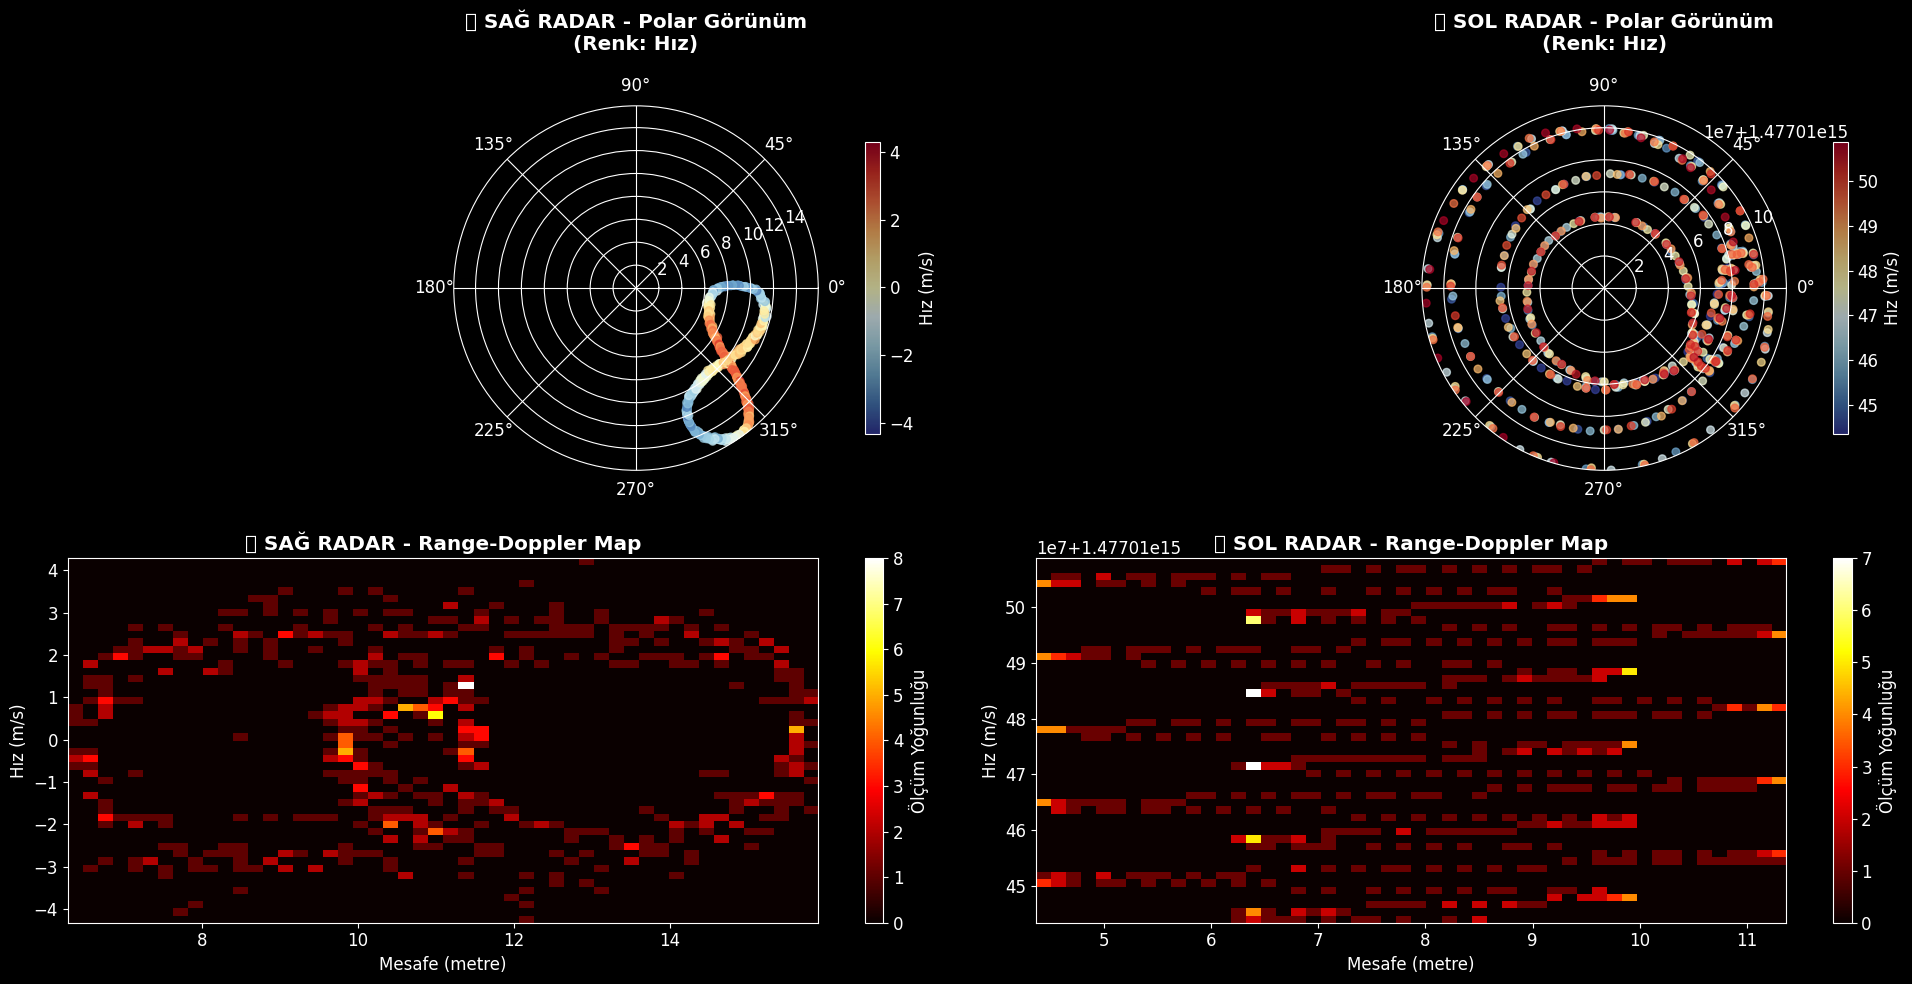

‚úÖ Polar g√∂r√ºn√ºmler ve Range-Doppler haritalarƒ± tamamlandƒ±!


In [642]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# üì• Veriyi oku (veri dosyan buraya yazƒ±lmalƒ±)
column_names = [
    'sensor_channel',  # R = Saƒü Radar, L = Sol Radar
    'm_rho',           # Range (metre)
    'm_phi',           # Bearing (radyan)
    'm_drho',          # Range rate (m/s)
    'timestamp',       
    'r_px', 'r_py',    # Ground truth pozisyon
    'r_vx', 'r_vy'     # Ground truth hƒ±z
]

print("üì° Radar verileri y√ºkleniyor...")
df = pd.read_csv("data-1.txt", sep="\t", names=column_names, header=None)

# üîÄ Sol ve saƒü radar verilerini ayƒ±r
right_sensor = df[df['sensor_channel'] == 'R'].copy()
left_sensor = df[df['sensor_channel'] == 'L'].copy()

# üîÑ Radyan ‚Üí Derece d√∂n√º≈ü√ºm√º (isteƒüe baƒülƒ±)
right_sensor['m_phi_deg'] = np.degrees(right_sensor['m_phi'])
left_sensor['m_phi_deg'] = np.degrees(left_sensor['m_phi'])

print(f"‚úÖ Saƒü radar verisi: {len(right_sensor)} √∂l√ß√ºm")
print(f"‚úÖ Sol radar verisi: {len(left_sensor)} √∂l√ß√ºm\n")

# üéØ G√∂rselle≈ütirme ba≈ülƒ±yor
print("üõ°Ô∏è Radar spesifik g√∂rselle≈ütirmeler olu≈üturuluyor...\n")
fig = plt.figure(figsize=(20, 10))

# 1. Saƒü radar polar plot
ax1 = plt.subplot(2, 2, 1, projection='polar')
scatter1 = ax1.scatter(right_sensor['m_phi'], right_sensor['m_rho'], 
                      c=right_sensor['m_drho'], s=30, alpha=0.7, cmap='RdYlBu_r')
ax1.set_title('üéØ SAƒû RADAR - Polar G√∂r√ºn√ºm\n(Renk: Hƒ±z)', fontweight='bold', pad=20)
ax1.set_ylim(0, right_sensor['m_rho'].max())
plt.colorbar(scatter1, ax=ax1, label='Hƒ±z (m/s)', shrink=0.8)

# 2. Sol radar polar plot
ax2 = plt.subplot(2, 2, 2, projection='polar')
if len(left_sensor) > 0:
    scatter2 = ax2.scatter(left_sensor['m_phi'], left_sensor['m_rho'], 
                          c=left_sensor['m_drho'], s=30, alpha=0.7, cmap='RdYlBu_r')
    ax2.set_title('üéØ SOL RADAR - Polar G√∂r√ºn√ºm\n(Renk: Hƒ±z)', fontweight='bold', pad=20)
    plt.colorbar(scatter2, ax=ax2, label='Hƒ±z (m/s)', shrink=0.8)
    if not left_sensor['m_rho'].isna().all():
        ax2.set_ylim(0, left_sensor['m_rho'].max())
    else:
        ax2.set_ylim(0, 50)
else:
    ax2.text(0.5, 0.5, 'Sol Radar Verisi Yok\n(Radar-Only Sistem)', 
             transform=ax2.transAxes, ha='center', va='center', fontsize=12)
    ax2.set_title('üéØ SOL RADAR - Veri Yok', fontweight='bold', pad=20)
    ax2.set_ylim(0, 50)

# 3. Saƒü radar i√ßin Range-Doppler Map
ax3 = plt.subplot(2, 2, 3)
hist_r, xedges_r, yedges_r = np.histogram2d(right_sensor['m_rho'], 
                                           right_sensor['m_drho'], bins=50)
im1 = ax3.imshow(hist_r.T, origin='lower', aspect='auto', cmap='hot',
                extent=[xedges_r[0], xedges_r[-1], yedges_r[0], yedges_r[-1]])
ax3.set_title('üî• SAƒû RADAR - Range-Doppler Map', fontweight='bold')
ax3.set_xlabel('Mesafe (metre)')
ax3.set_ylabel('Hƒ±z (m/s)')
plt.colorbar(im1, ax=ax3, label='√ñl√ß√ºm Yoƒüunluƒüu')

# 4. Sol radar i√ßin Range-Doppler Map
ax4 = plt.subplot(2, 2, 4)
if len(left_sensor) > 0:
    hist_l, xedges_l, yedges_l = np.histogram2d(left_sensor['m_rho'], 
                                               left_sensor['m_drho'], bins=50)
else:
    hist_l = np.zeros((50, 50))
    xedges_l = np.linspace(0, 50, 51)
    yedges_l = np.linspace(-5, 5, 51)

im2 = ax4.imshow(hist_l.T, origin='lower', aspect='auto', cmap='hot',
                extent=[xedges_l[0], xedges_l[-1], yedges_l[0], yedges_l[-1]])
ax4.set_title('üî• SOL RADAR - Range-Doppler Map', fontweight='bold')
ax4.set_xlabel('Mesafe (metre)')
ax4.set_ylabel('Hƒ±z (m/s)')
plt.colorbar(im2, ax=ax4, label='√ñl√ß√ºm Yoƒüunluƒüu')

plt.tight_layout()
plt.show()

print("‚úÖ Polar g√∂r√ºn√ºmler ve Range-Doppler haritalarƒ± tamamlandƒ±!")


In [643]:
print(df.columns)
print(df.head())


Index(['sensor_channel', 'm_rho', 'm_phi', 'm_drho', 'timestamp', 'r_px',
       'r_py', 'r_vx', 'r_vy'],
      dtype='object')
  sensor_channel    m_rho     m_phi        m_drho     timestamp  r_px  \
0              R  8.46642  0.028760 -3.040350e+00  1.477010e+15  8.60   
1              L  8.44818  0.251553  1.477010e+15  8.450000e+00  0.25   
2              R  8.57101  0.028232 -1.052580e-02  1.477010e+15  8.45   
3              L  8.45582  0.253997  1.477010e+15  8.450000e+00  0.25   
4              R  8.42927  0.030143 -1.858130e+00  1.477010e+15  8.35   

      r_py     r_vx  r_vy  
0  0.25000 -3.00029   0.0  
1 -3.00027  0.00000   NaN  
2  0.25000  0.00000   0.0  
3  0.00000  0.00000   NaN  
4  0.25000 -1.81979   0.0  


üåç 3D ve interaktif g√∂rselle≈ütirmeler olu≈üturuluyor...



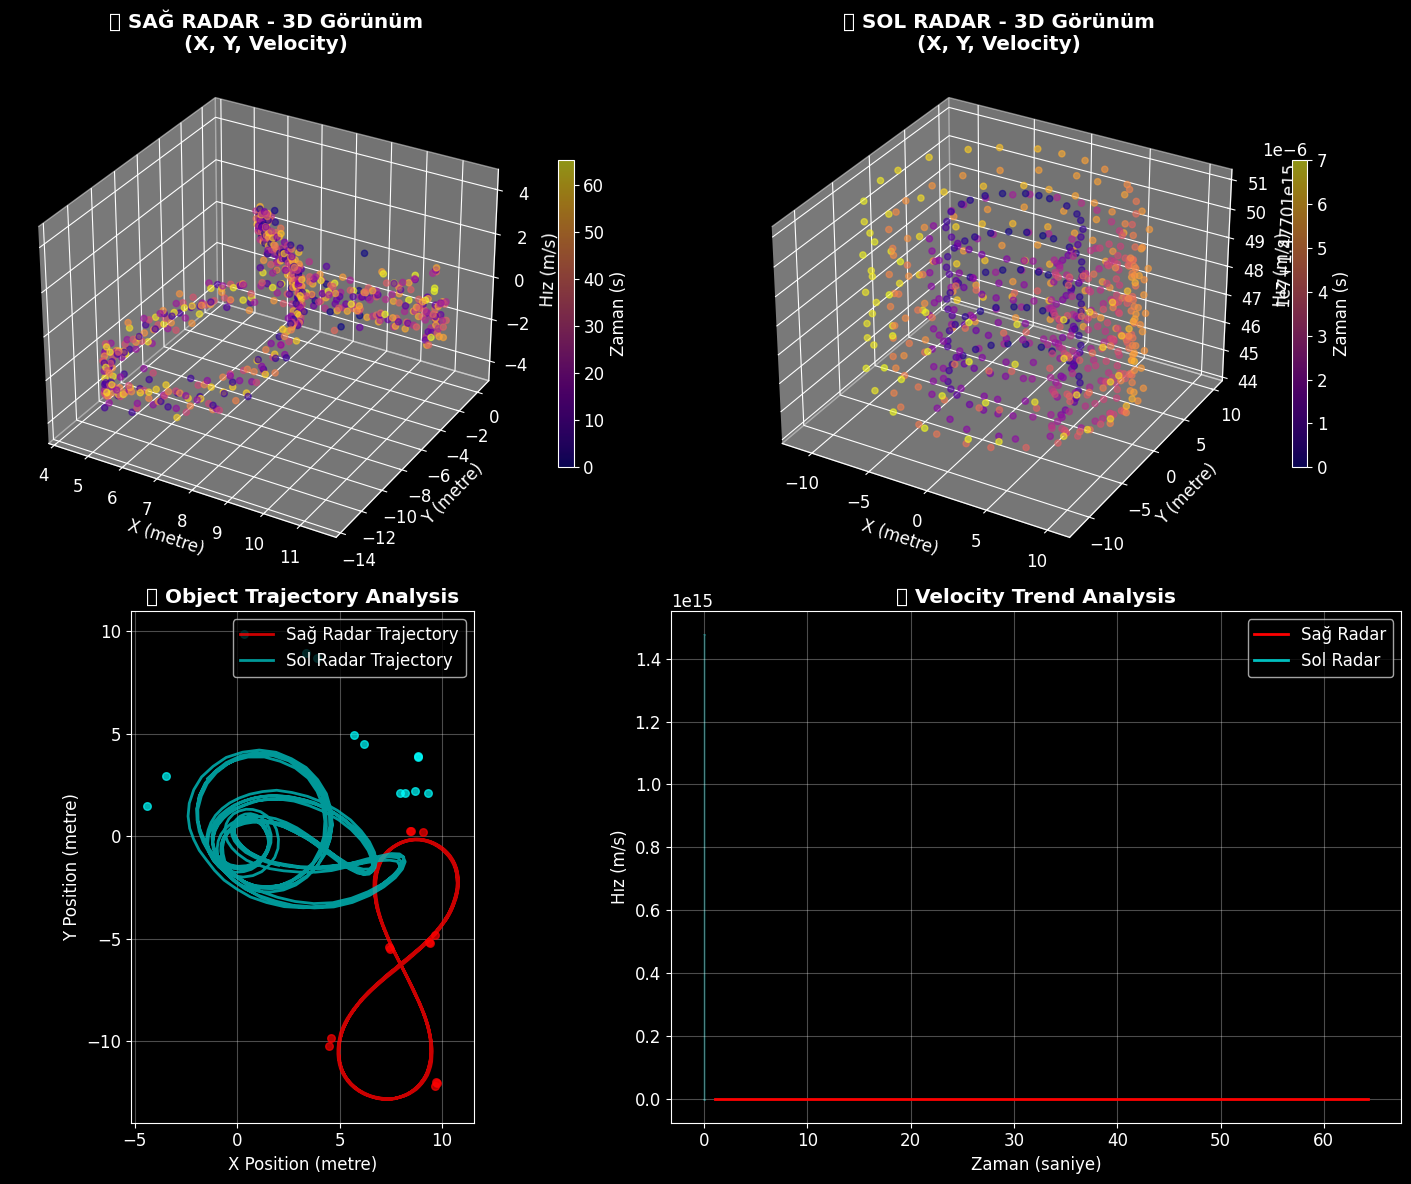

‚úÖ 3D g√∂rselle≈ütirmeler ve trajectory analizi tamamlandƒ±!


In [644]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("üåç 3D ve interaktif g√∂rselle≈ütirmeler olu≈üturuluyor...\n")

# √ñrnek veri: Ger√ßek verini burada y√ºkle
# df = pd.read_hdf("dosya_yolu.h5")

# Saƒü ve sol radar filtreleri (sensor_channel 'R' veya 'L' olarak varsayƒ±lƒ±yor)
right_sensor = df[df['sensor_channel'] == 'R'].copy()
left_sensor = df[df['sensor_channel'] == 'L'].copy()

# time_relative s√ºtunlarƒ±nƒ± olu≈ütur (timestamp mikro saniye ise 1e6'ya b√∂l)
if 'time_relative' not in right_sensor.columns:
    right_sensor['time_relative'] = (right_sensor['timestamp'] - right_sensor['timestamp'].min()) / 1e6

if len(left_sensor) > 0 and 'time_relative' not in left_sensor.columns:
    left_sensor['time_relative'] = (left_sensor['timestamp'] - left_sensor['timestamp'].min()) / 1e6

# A√ßƒ± d√∂n√º≈ü√ºm√º (radyan ‚Üí derece)
df['m_phi_deg'] = np.degrees(df['m_phi'])

# Polar ‚Üí Kartezyen d√∂n√º≈ü√ºm fonksiyonu
def polar_to_cartesian(range_data, angle_data):
    x = range_data * np.cos(angle_data)
    y = range_data * np.sin(angle_data)
    return x, y

# Saƒü radar koordinatlarƒ±
x_right, y_right = polar_to_cartesian(right_sensor['m_rho'], right_sensor['m_phi'])

# Sol radar koordinatlarƒ±
if len(left_sensor) > 0:
    x_left, y_left = polar_to_cartesian(left_sensor['m_rho'], left_sensor['m_phi'])
else:
    x_left, y_left = np.array([]), np.array([])

fig = plt.figure(figsize=(15, 12))

# 1. Saƒü radar 3D Scatter
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
scatter_3d_r = ax1.scatter(x_right, y_right, right_sensor['m_drho'], 
                           c=right_sensor['time_relative'], cmap='plasma', alpha=0.6, s=20)
ax1.set_title('üåê SAƒû RADAR - 3D G√∂r√ºn√ºm\n(X, Y, Velocity)', fontweight='bold')
ax1.set_xlabel('X (metre)')
ax1.set_ylabel('Y (metre)')
ax1.set_zlabel('Hƒ±z (m/s)')
plt.colorbar(scatter_3d_r, ax=ax1, label='Zaman (s)', shrink=0.6)

# 2. Sol radar 3D Scatter (varsa)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
if len(left_sensor) > 0:
    scatter_3d_l = ax2.scatter(x_left, y_left, left_sensor['m_drho'], 
                               c=left_sensor['time_relative'], cmap='plasma', alpha=0.6, s=20)
    plt.colorbar(scatter_3d_l, ax=ax2, label='Zaman (s)', shrink=0.6)
ax2.set_title('üåê SOL RADAR - 3D G√∂r√ºn√ºm\n(X, Y, Velocity)', fontweight='bold')
ax2.set_xlabel('X (metre)')
ax2.set_ylabel('Y (metre)')
ax2.set_zlabel('Hƒ±z (m/s)')

# 3. Trajectory Analysis
ax3 = fig.add_subplot(2, 2, 3)
window_size = 20
x_right_smooth = pd.Series(x_right).rolling(window=window_size, center=True).mean()
y_right_smooth = pd.Series(y_right).rolling(window=window_size, center=True).mean()
ax3.plot(x_right_smooth, y_right_smooth, 'r-', alpha=0.8, linewidth=2, label='Saƒü Radar Trajectory')
ax3.scatter(x_right[::50], y_right[::50], c='red', s=30, alpha=0.7, zorder=5)

if len(left_sensor) > 0:
    x_left_smooth = pd.Series(x_left).rolling(window=window_size, center=True).mean()
    y_left_smooth = pd.Series(y_left).rolling(window=window_size, center=True).mean()
    ax3.plot(x_left_smooth, y_left_smooth, 'c-', alpha=0.8, linewidth=2, label='Sol Radar Trajectory')
    ax3.scatter(x_left[::50], y_left[::50], c='cyan', s=30, alpha=0.7, zorder=5)

ax3.set_title('üõ£Ô∏è Object Trajectory Analysis', fontweight='bold')
ax3.set_xlabel('X Position (metre)')
ax3.set_ylabel('Y Position (metre)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

# 4. Velocity vs Time Analysis
ax4 = fig.add_subplot(2, 2, 4)
vel_right_smooth = pd.Series(right_sensor['m_drho']).rolling(window=window_size, center=True).mean()
ax4.plot(right_sensor['time_relative'], vel_right_smooth, 'r-', linewidth=2, label='Saƒü Radar')

if len(left_sensor) > 0:
    vel_left_smooth = pd.Series(left_sensor['m_drho']).rolling(window=window_size, center=True).mean()
    ax4.plot(left_sensor['time_relative'], vel_left_smooth, 'c-', linewidth=2, label='Sol Radar')
    ax4.fill_between(left_sensor['time_relative'], vel_left_smooth, alpha=0.3, color='cyan')

ax4.set_title('üìà Velocity Trend Analysis', fontweight='bold')
ax4.set_xlabel('Zaman (saniye)')
ax4.set_ylabel('Hƒ±z (m/s)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("‚úÖ 3D g√∂rselle≈ütirmeler ve trajectory analizi tamamlandƒ±!")
